## Tropical Post Eruptions Year 2

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import cartopy.util as util
import matplotlib as mpl
from glob import glob
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import scipy.stats as stats
import netCDF4 as nc4

mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16

### Loading in files and variables

In [2]:
casePath='/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/'
caseName='b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002'

In [3]:
case = casePath + caseName + '.pop.h.' + 'TEMP.*' + '.nc' #sample one 0020-12.nc' 
data = xr.open_mfdataset(case)
data

<xarray.Dataset>
Dimensions:                 (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 12000, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 0850-02-01 00:00:00 ... 1850-01-01 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    moc_components          (time, moc_comp) |S384 dask.array<chunksize=(600, 3), meta=np.ndarray>
    transport_components    (time, transport_comp) |S384 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions       (time, transport_reg) |S384 dask.array<chunksize=(600, 2), meta=np.ndarray>
    dz                      (time, z_t) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    dzw                     (time, z_w) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    KMT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    KMU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    REGION_MASK             (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    UAREA                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    TAREA                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HU                      (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HT                      (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HTN                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HTE                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HUS                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HUW                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLE                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                  (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    days_in_norm_year       (time) timedelta64[ns] 365 days ... 365 days
    grav                    (time) float64 980.6 980.6 980.6 ... 980.6 980.6
    omega                   (time) float64 7.292e-05 7.292e-05 ... 7.292e-05
    radius                  (

In [4]:
case

'/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.*.nc'

In [5]:
def pop_add_cyclic(data,TLAT,TLONG): 
    nj = TLAT.shape[0] # size of POP grid
    ni = TLONG.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)
    tlon = TLONG
    tlat = TLAT
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane
    if ni == 320: # this is the x1 POP grid
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.
    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8
    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))
    lon_dim = 1 #ds[v].dims.index('nlon')
    field = data
    field = np.concatenate((field, field), 1)
    field = field[:, xL:xR]
    field = np.concatenate((field, field[:, 0:1]), lon_dim)
    
    return field, lat, lon

In [6]:
from scipy.ndimage import uniform_filter1d

def rolling_mean(a, W, axis=-1):
    # a : Input ndarray
    # W : Window size
    # axis : Axis along which we will apply rolling/sliding mean
    hW = W//2
    L = a.shape[axis]-W+1   
    indexer = [slice(None) for _ in range(a.ndim)]
    indexer[axis] = slice(hW,hW+L)
    return uniform_filter1d(a,W,axis=axis)[tuple(indexer)]

In [7]:
def ENSO_area_weighted_mean(var,TAREA):  
    # assumes 2D field as var input
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    TAREA = np.ma.masked_invalid(TAREA) # I think this is necessary
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])
    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t,167:206,203:248],weights=TAREA[167:206,203:248])
    return ave

In [8]:
def Trop_area_weighted_mean(var,TAREA):  
    # assumes 2D field as var input
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    TAREA = np.ma.masked_invalid(TAREA) # I think this is necessary
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])
    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t],weights=TAREA)
    return ave

### Get the lat and lon locations for the El Nino region: 

In [9]:
data['TLAT'][206,50].values

array(5.18019218)

In [10]:
data['TLAT'][167,50].values

array(-5.2090898)

In [11]:
abs(data['TLONG'][50,203].values-360)

171.06249474233516

In [12]:
abs(data['TLONG'][50,248].values-360)

120.43749333356618

### Pulling SST and monthly

In [13]:
data = data.TEMP[:,0,:,:]
data

<xarray.DataArray 'TEMP' (time: 12000, nlat: 384, nlon: 320)>
dask.array<getitem, shape=(12000, 384, 320), dtype=float32, chunksize=(600, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0850-02-01 00:00:00 ... 1850-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

In [14]:
monthlydata=data.sel(time=slice('1000-01-01 00:00:00','1030-12-31 00:00:00')).groupby('time.month').mean(dim='time')

### Tropical Volcanoes

Chronological Order

In [46]:
unident1_post_2yr = data.sel(time=slice('1109-02-01 00:00:00','1110-02-01 00:00:00')).groupby('time.month').mean(dim='time')
unident2_post_2yr = data.sel(time=slice('1172-02-01 00:00:00','1173-02-01 00:00:00')).groupby('time.month').mean(dim='time')
unident3_post_2yr = data.sel(time=slice('1231-08-01 00:00:00','1232-08-01 00:00:00')).groupby('time.month').mean(dim='time')
samalas_post_2yr = data.sel(time=slice('1258-07-01 00:00:00','1259-07-01 00:00:00')).groupby('time.month').mean(dim='time')
unident4_post_2yr = data.sel(time=slice('1386-01-01 00:00:00','1387-01-01 00:00:00')).groupby('time.month').mean(dim='time')
unident5_post_2yr = data.sel(time=slice('1459-08-01 00:00:00','1460-08-01 00:00:00')).groupby('time.month').mean(dim='time')
huay_post_2yr = data.sel(time=slice('1601-03-01 00:00:00','1602-03-01 00:00:00')).groupby('time.month').mean(dim='time')
parker_post_2yr = data.sel(time=slice('1642-01-01 00:00:00','1643-01-01 00:00:00')).groupby('time.month').mean(dim='time')
unident6_post_2yr = data.sel(time=slice('1810-11-01 00:00:00','1811-11-01 00:00:00')).groupby('time.month').mean(dim='time')
tambora_post_2yr = data.sel(time=slice('1816-05-01 00:00:00','1817-05-01 00:00:00')).groupby('time.month').mean(dim='time')

#### Unidentified 1 1108

In [47]:
unident1_post2_anomaly = unident1_post_2yr-monthlydata
unident1_post2_anomaly

<xarray.DataArray 'TEMP' (month: 12, nlat: 384, nlon: 320)>
dask.array<sub, shape=(12, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon

In [48]:
unident1_post2_rm = rolling_mean(unident1_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [49]:
import netCDF4 as nc4

In [50]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [51]:
unident1_post2_wm = ENSO_area_weighted_mean(unident1_post2_rm,TAREA)
unident1_post2_wm

array([ 0.16090204, -0.23037268, -0.18006665,  0.30202225,  0.84482257,
        1.39606945,  1.83347735,  2.17060639])

In [52]:
TLAT = extract.variables['TLAT'][:]

In [53]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [54]:
unident1_post2_rsst = Trop_area_weighted_mean(unident1_post2_rm,TAREA)

In [55]:
unident1_post2_rsst

array([-0.44007118, -0.44186137, -0.44450068, -0.43263117, -0.39568806,
       -0.35439354, -0.34261855, -0.34599152])

In [56]:
unident1_post2_ra = unident1_post2_rm[0] - unident1_post2_rsst[0]

In [57]:
plot_data_unident1_post2,new_lats,new_lons = pop_add_cyclic(unident1_post2_ra,data['TLAT'],data['TLONG']) 

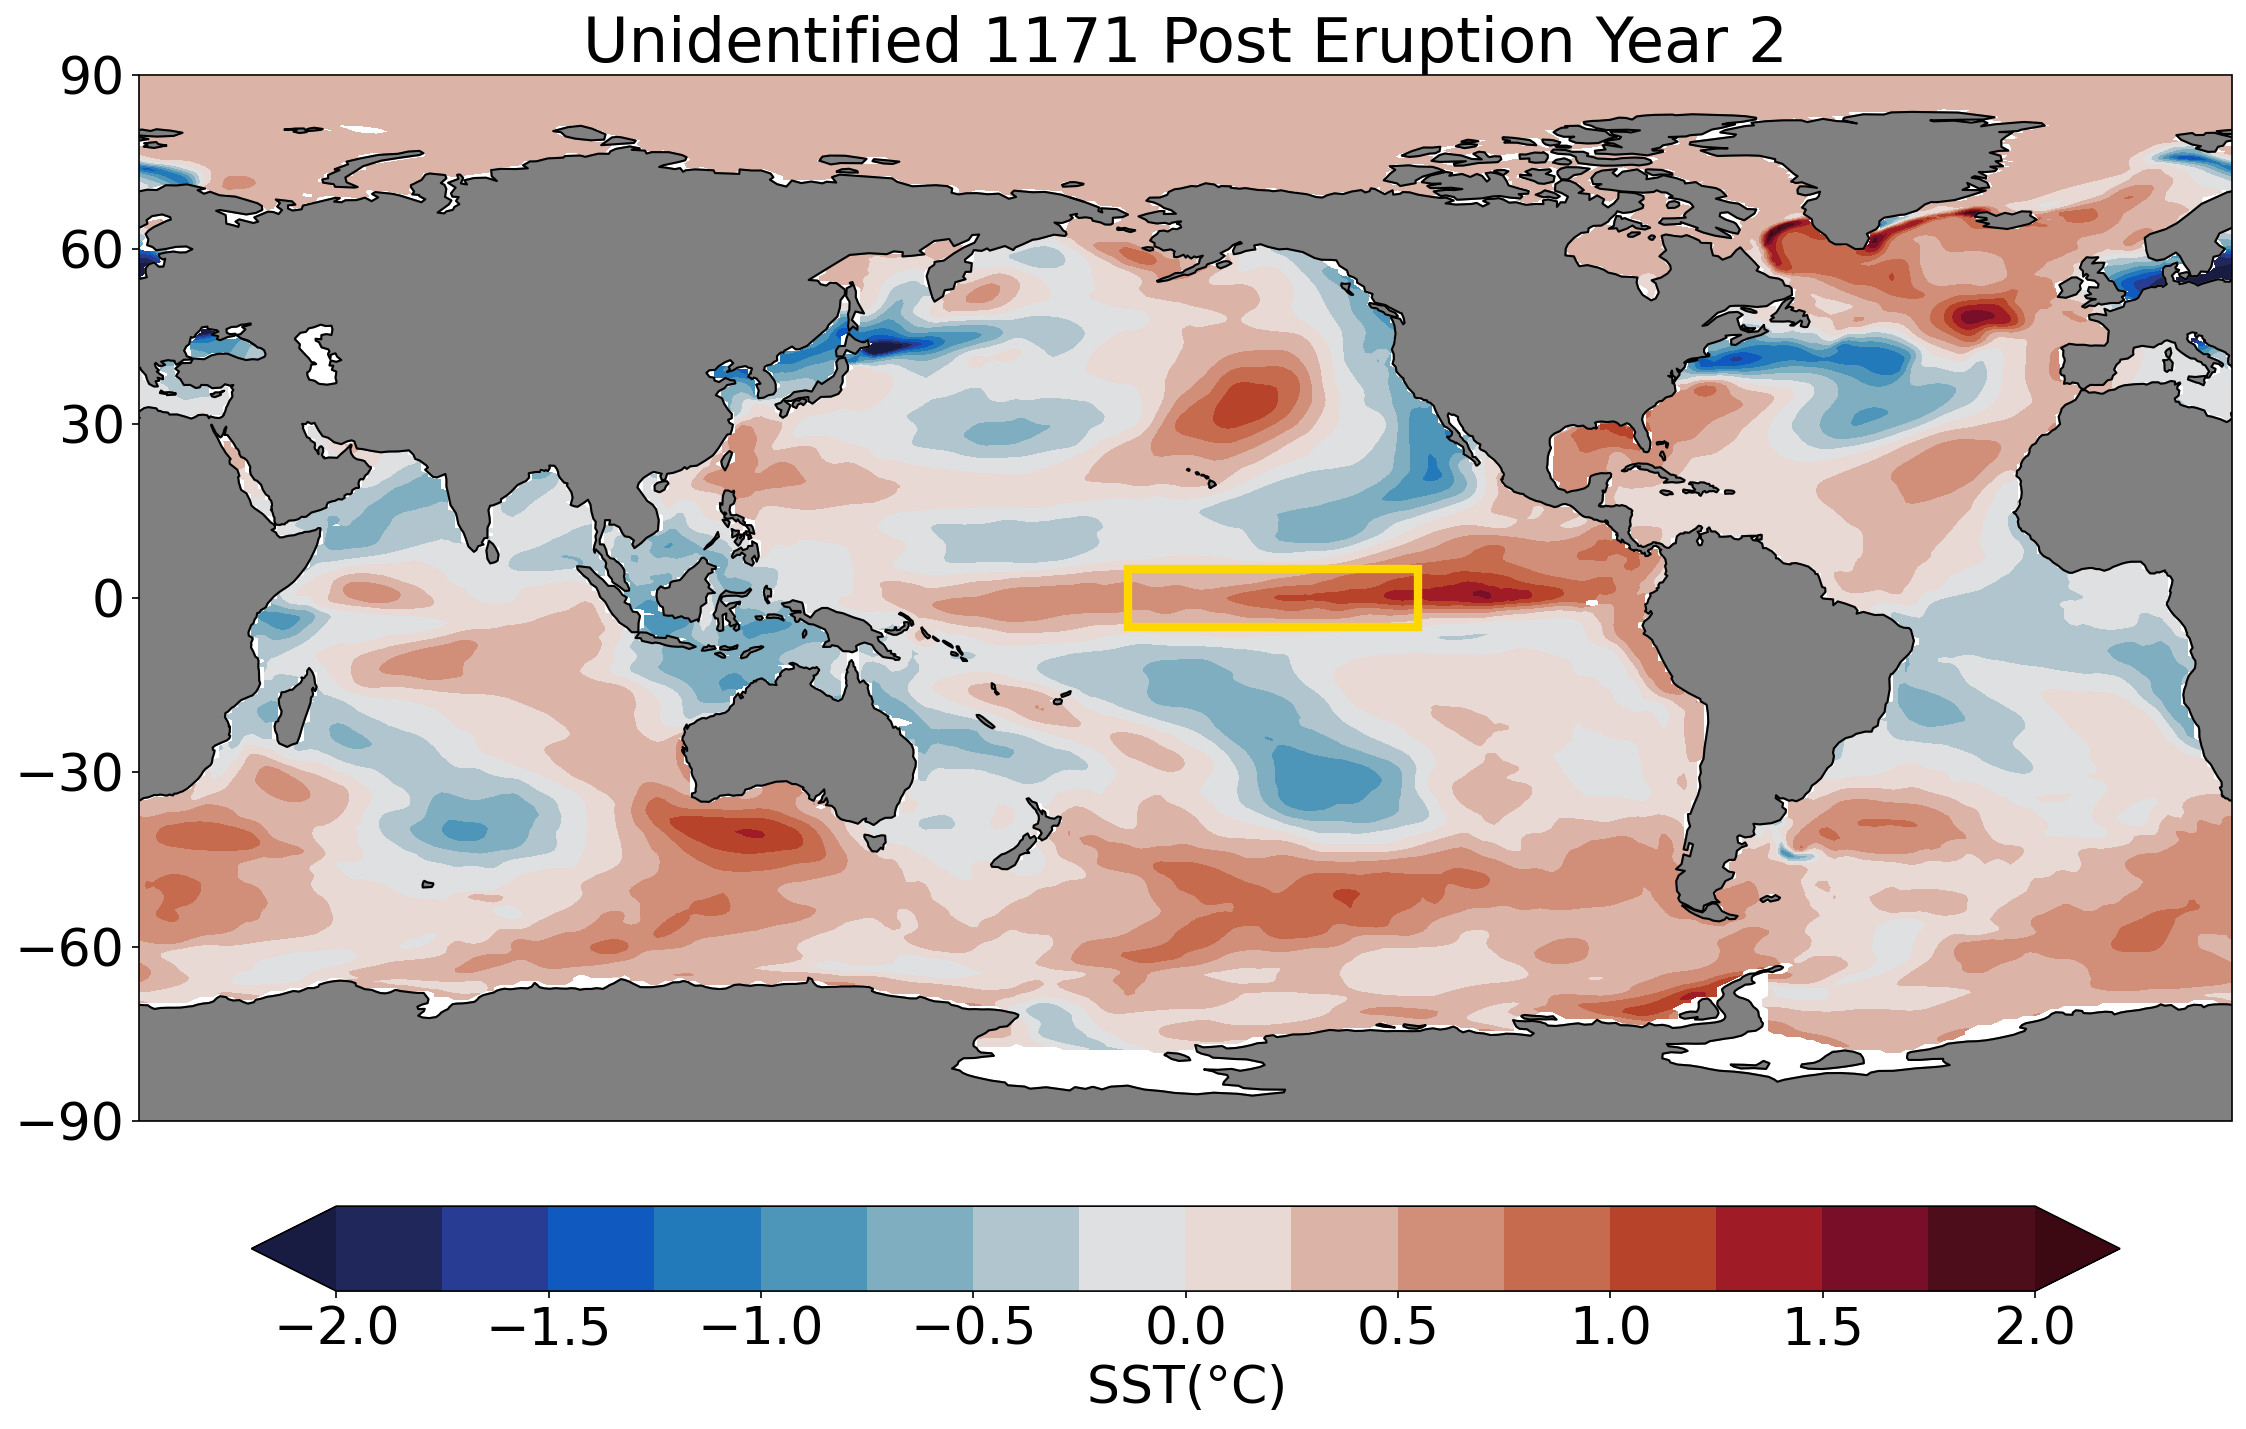

In [58]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident1_post2,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1171 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

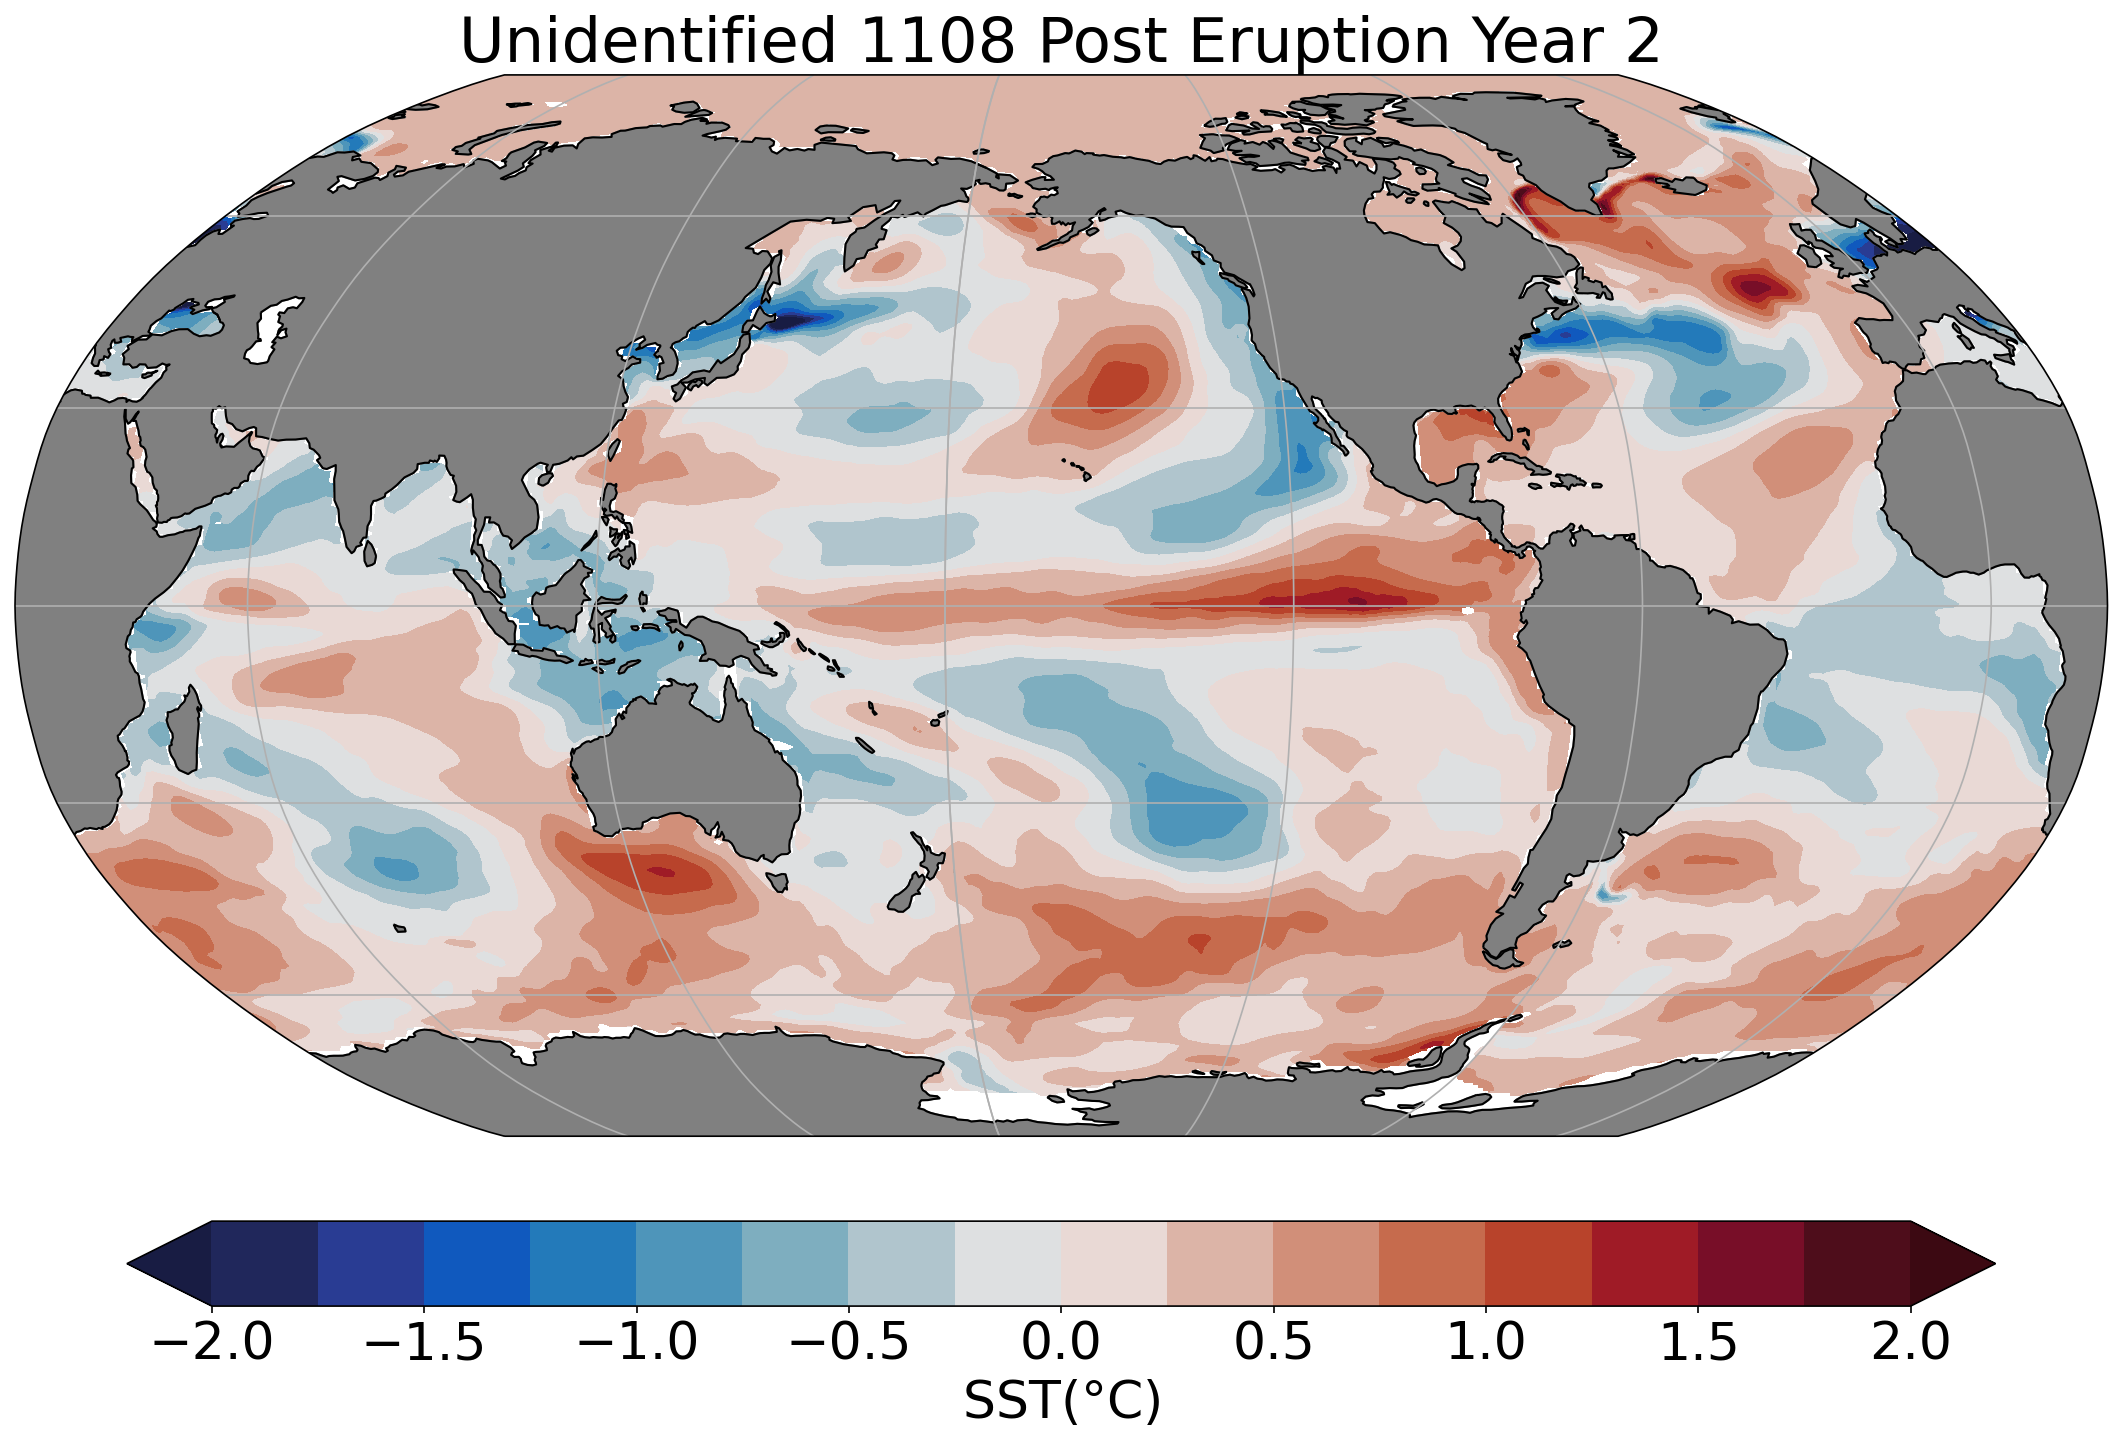

In [59]:
#projection=ccrs.PlateCarree(central_longitude = -160)
projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()
ax.gridlines()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident1_post2,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)

#plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)

#ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
#ax.set_yticklabels(['-90', '-60', '-30', '0', '30', '60', '90'])

#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
    
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='orange',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1108 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 2 1171

In [60]:
unident2_post2_anomaly = unident2_post_2yr-monthlydata

In [61]:
unident2_post2_rm = rolling_mean(unident2_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [62]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [63]:
unident2_post2_wm = ENSO_area_weighted_mean(unident2_post2_rm,TAREA)
unident2_post2_wm

array([-0.39660139, -0.26255896, -0.36516233, -0.63265399, -0.90282493,
       -1.1166037 , -1.12600533, -1.163424  ])

In [64]:
TLAT = extract.variables['TLAT'][:]

In [65]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [66]:
unident2_post2_rsst = Trop_area_weighted_mean(unident2_post2_rm,TAREA)

In [67]:
unident2_post2_rsst

array([-0.59815874, -0.61200139, -0.64443415, -0.67699246, -0.69986229,
       -0.70531794, -0.68853597, -0.67646456])

In [68]:
unident2_post2_ra = unident2_post2_rm[0] - unident2_post2_rsst[0]

In [69]:
plot_data_unident2_post2,new_lats,new_lons = pop_add_cyclic(unident2_post2_ra,data['TLAT'],data['TLONG'])

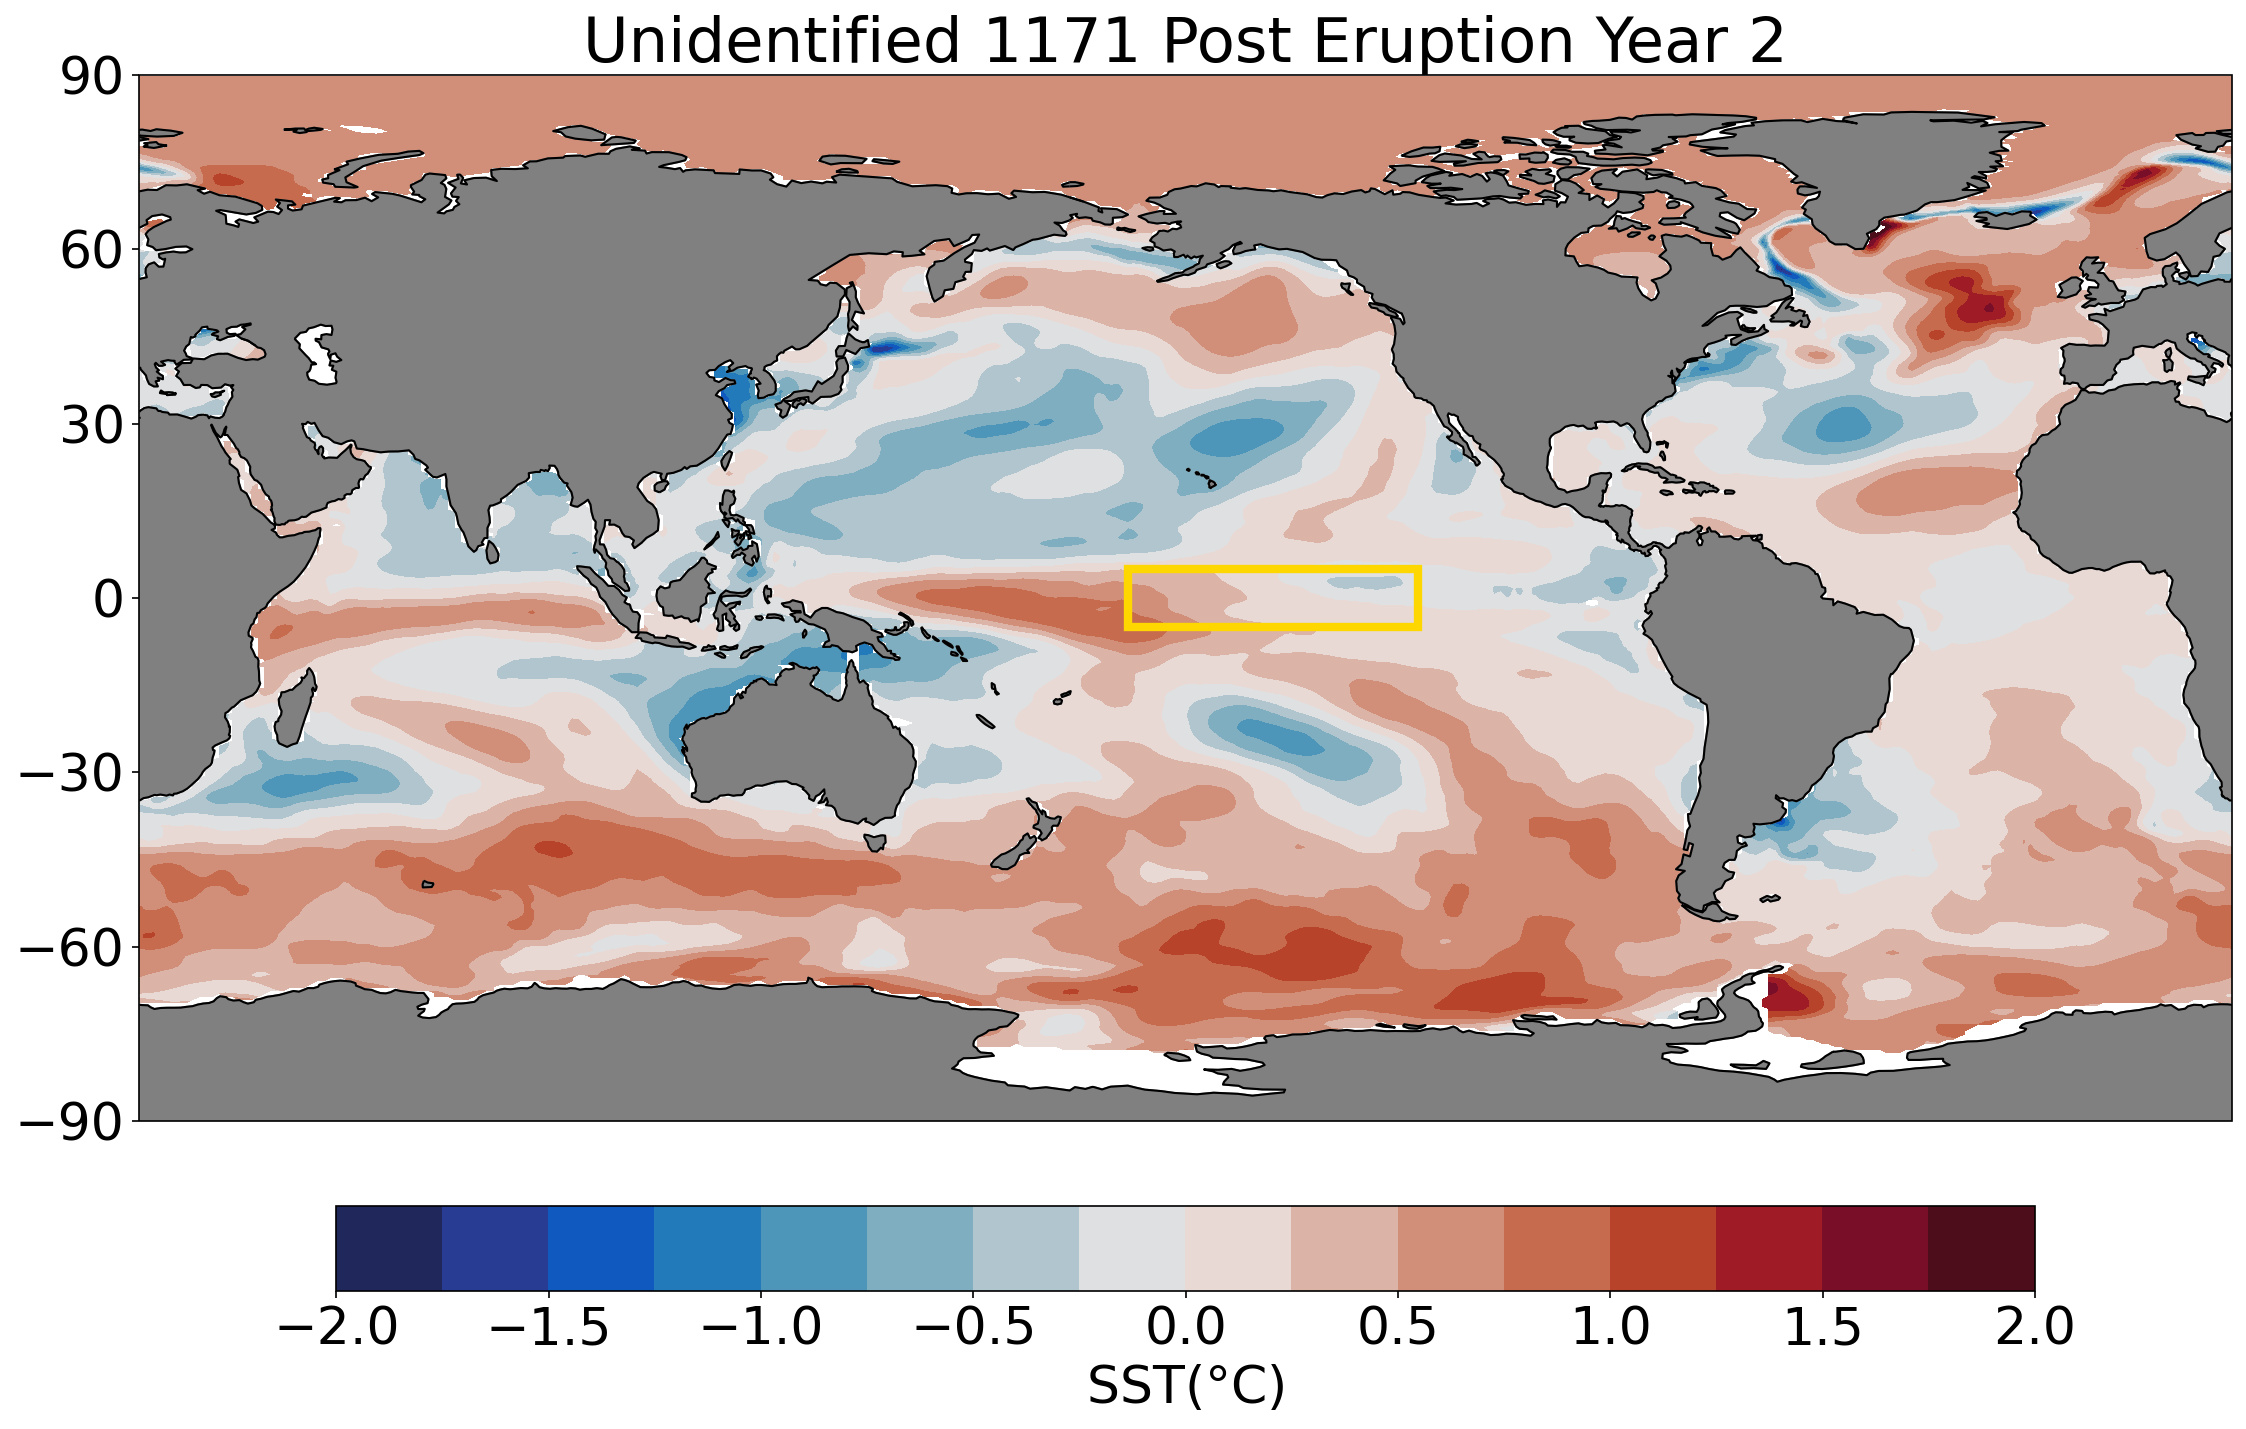

In [70]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident2_post2,levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1171 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 3 1230

In [71]:
unident3_post2_anomaly = unident3_post_2yr-monthlydata

In [72]:
unident3_post2_rm = rolling_mean(unident3_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [73]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [74]:
unident3_post2_wm = ENSO_area_weighted_mean(unident3_post2_rm,TAREA)
unident3_post2_wm

array([2.07886838, 1.79458094, 1.4622133 , 1.1898912 , 1.27252422,
       1.52867619, 1.86578312, 2.25094939])

In [75]:
TLAT = extract.variables['TLAT'][:]

In [76]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [77]:
unident3_post2_rsst = Trop_area_weighted_mean(unident3_post2_rm,TAREA)
unident3_post2_rsst

array([-0.23328271, -0.18209724, -0.17644123, -0.21772102, -0.307271  ,
       -0.39352729, -0.45600678, -0.49433892])

In [78]:
unident3_post2_ra = unident3_post2_rm[0] - unident3_post2_rsst[0]

In [79]:
plot_data_unident3_post2,new_lats,new_lons = pop_add_cyclic(unident3_post2_ra,data['TLAT'],data['TLONG']) 

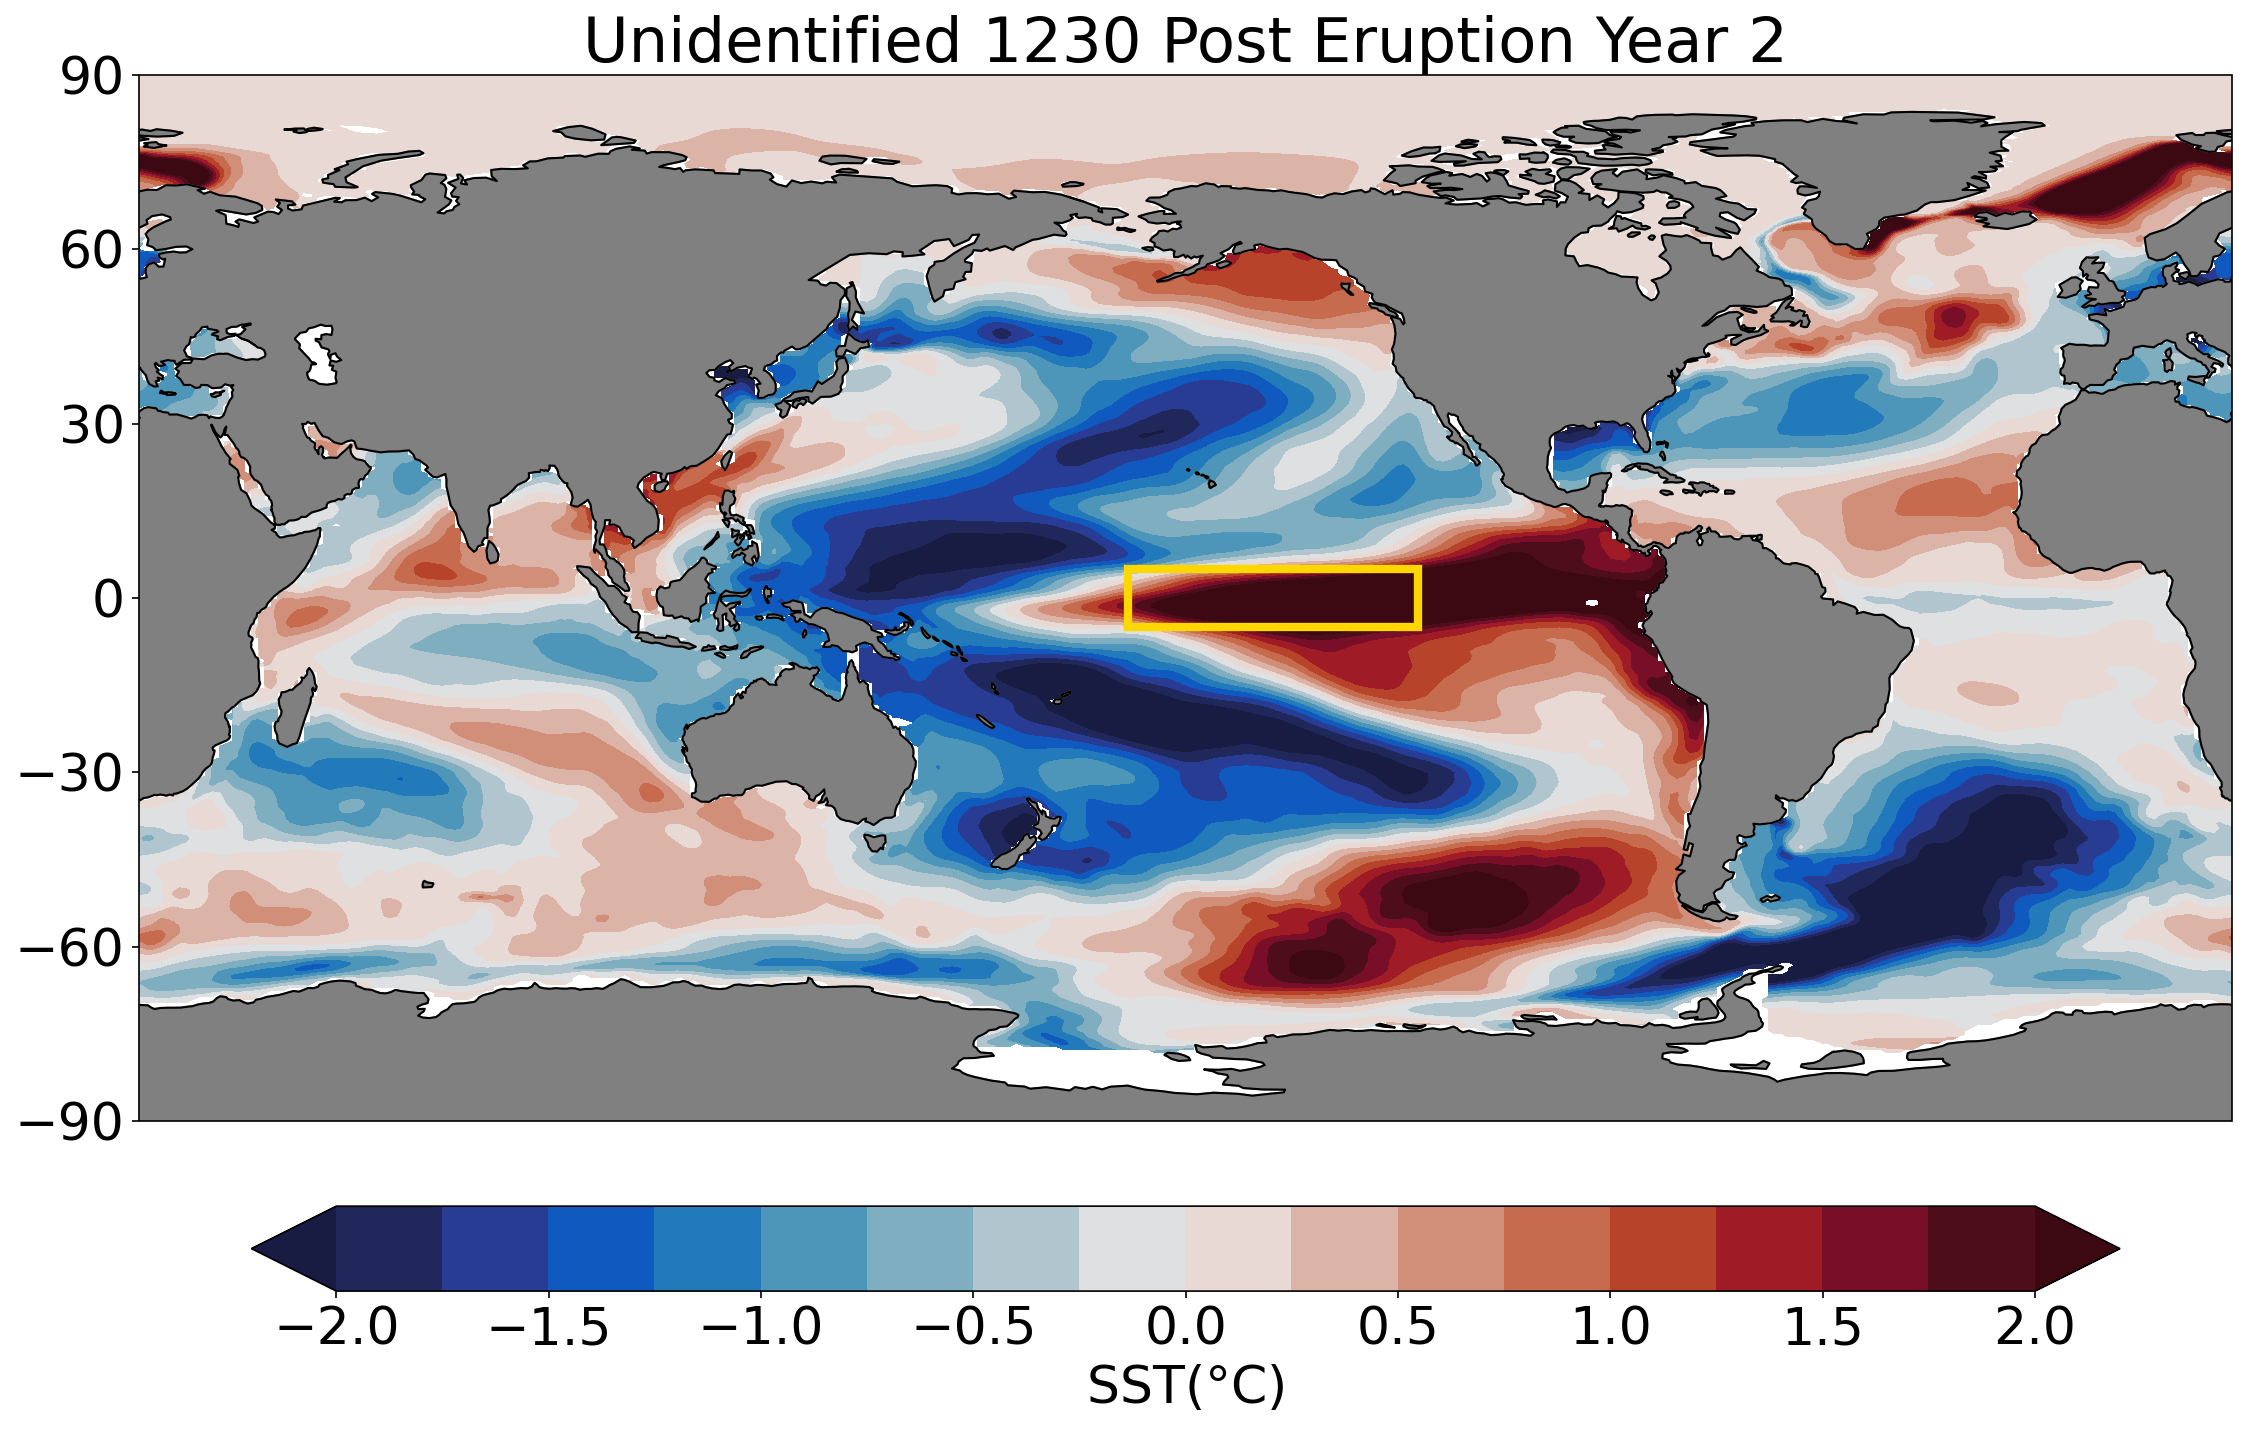

In [81]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

#levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident3_post2,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1230 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Samalas 1257

In [82]:
samalas_post2_anomaly = samalas_post_2yr-monthlydata

In [83]:
samalas_post2_rm = rolling_mean(samalas_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [84]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [85]:
samalas_post2_wm = ENSO_area_weighted_mean(samalas_post2_rm,TAREA)
samalas_post2_wm

array([-0.24474235, -0.57412267, -0.92589326, -1.06410773, -0.94076497,
       -0.65189629, -0.30278013, -0.05119654])

In [86]:
TLAT = extract.variables['TLAT'][:]

In [87]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [88]:
samalas_post2_rsst = Trop_area_weighted_mean(samalas_post2_rm,TAREA)
samalas_post2_rsst

array([-1.89538756, -1.91758833, -1.90877962, -1.87891821, -1.83133359,
       -1.7754564 , -1.72717208, -1.73402461])

In [89]:
samalas_post2_ra = samalas_post2_rm[0] - samalas_post2_rsst[0]

In [90]:
plot_data_samalas_post2,new_lats,new_lons = pop_add_cyclic(samalas_post2_ra,data['TLAT'],data['TLONG']) 

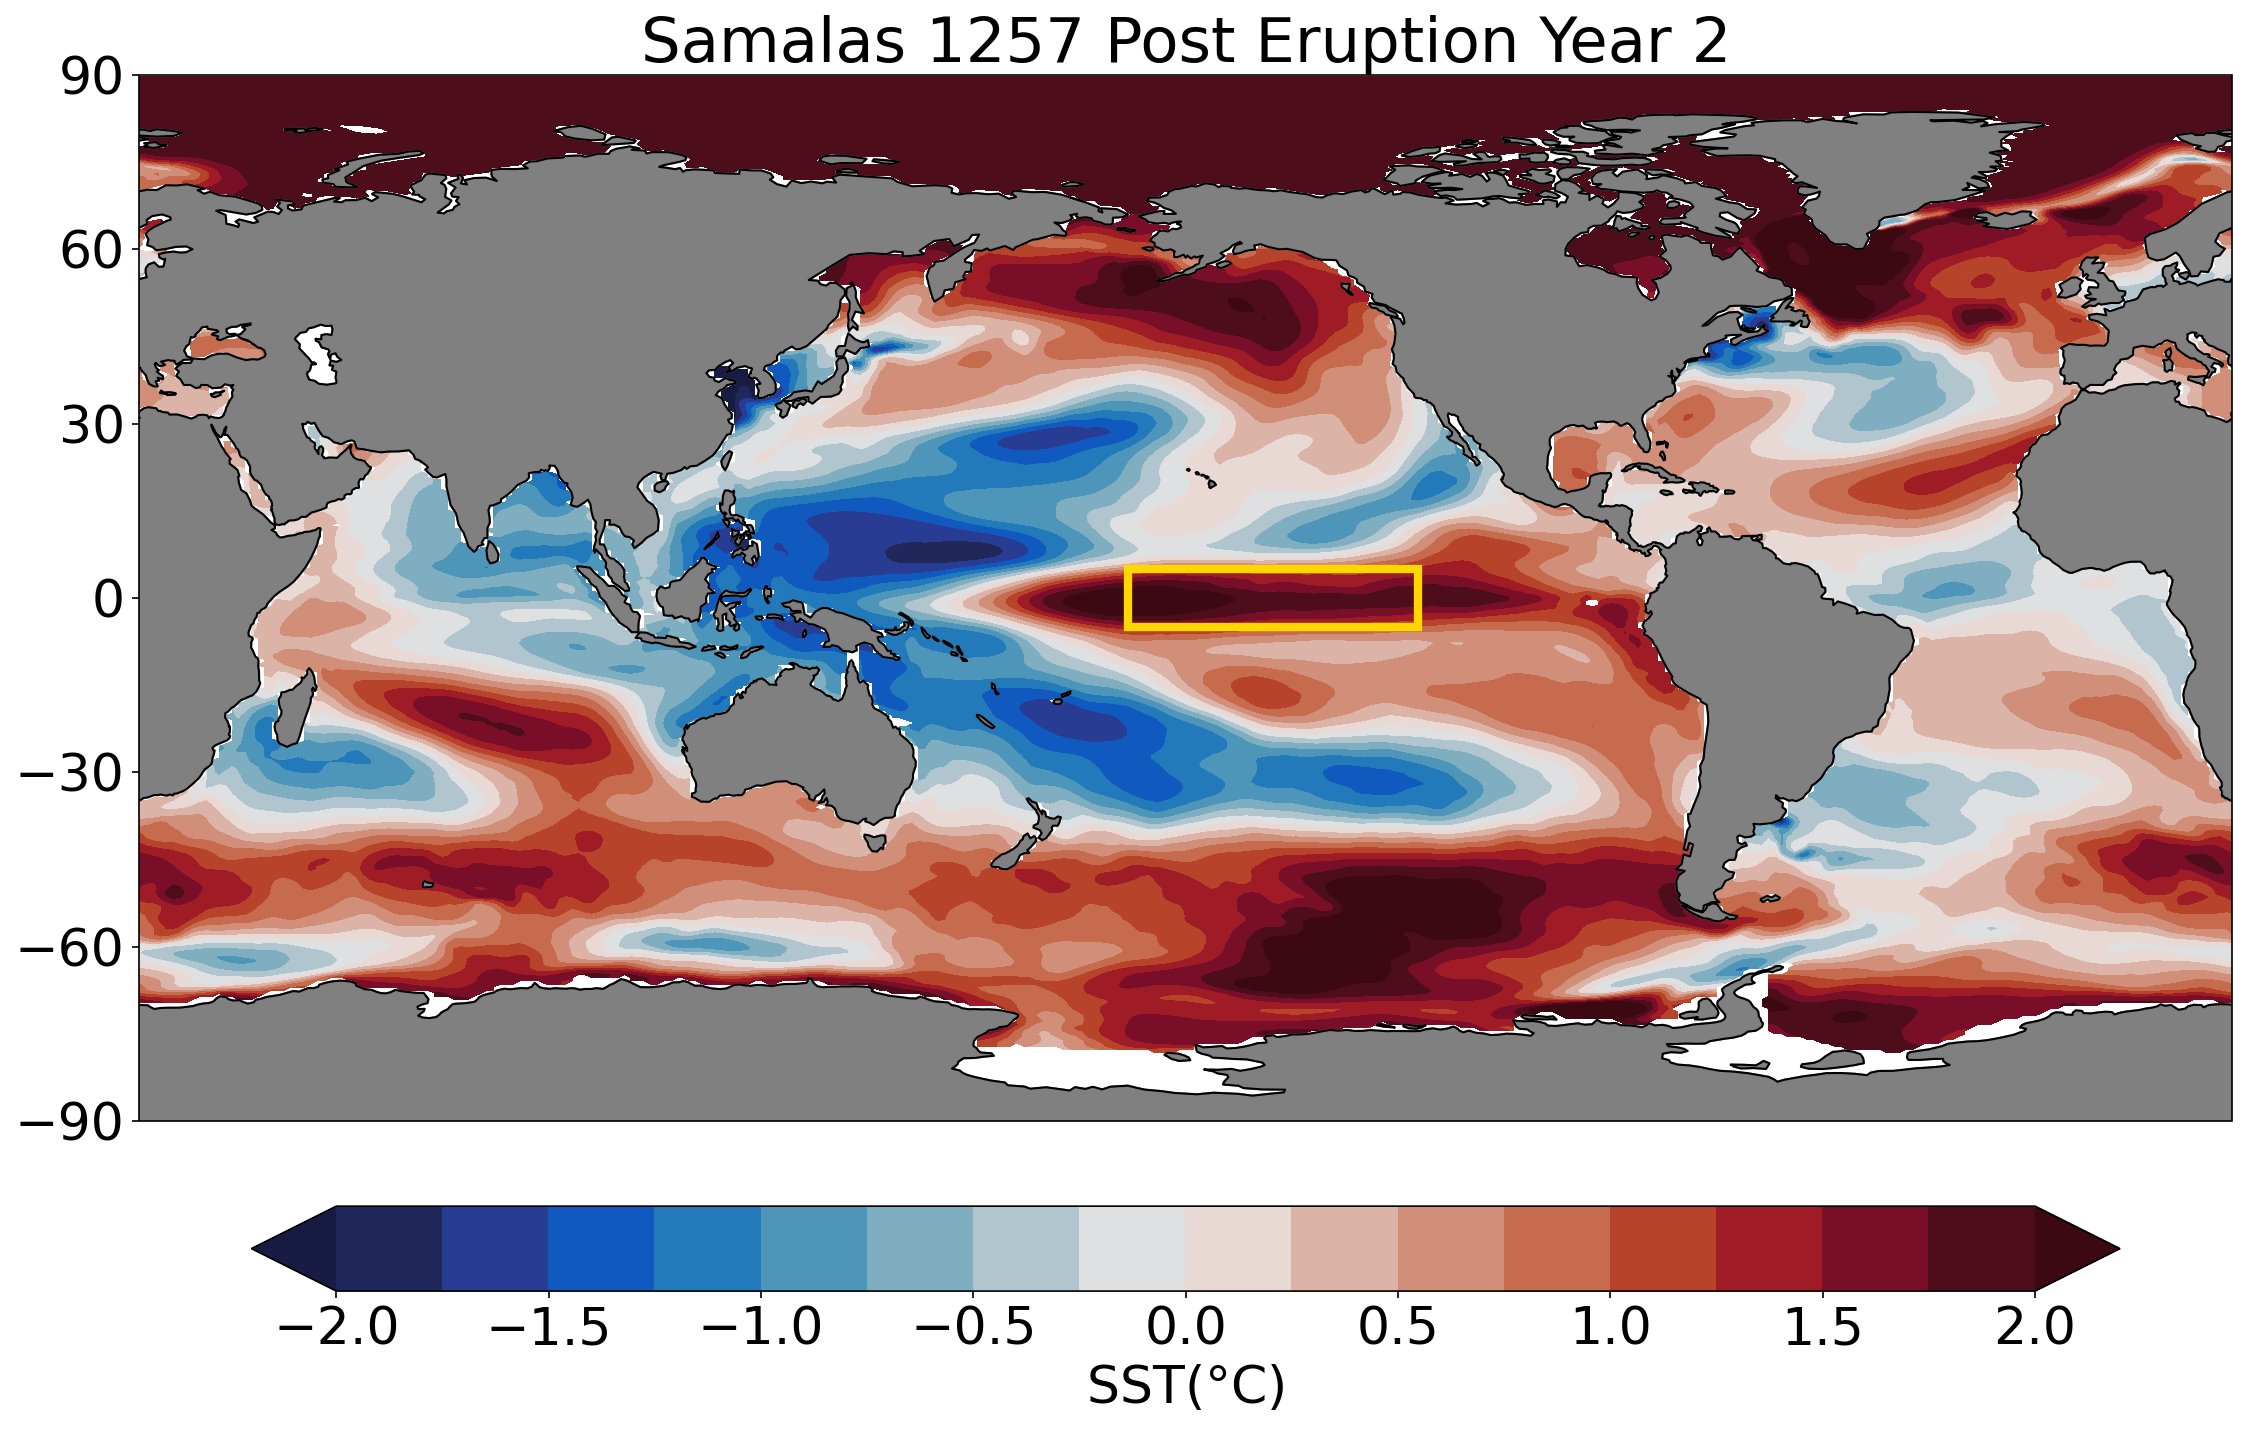

In [112]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_samalas_post2,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Samalas 1257 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 4 1385

In [113]:
unident4_post2_anomaly = unident4_post_2yr-monthlydata

In [114]:
unident4_post2_rm = rolling_mean(unident4_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [115]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [116]:
unident4_post2_wm = ENSO_area_weighted_mean(unident4_post2_rm,TAREA)
unident4_post2_wm

array([-1.30293471, -1.21305428, -0.67950773, -0.29777598, -0.09532484,
        0.09293828,  0.31258687,  0.4753413 ])

In [117]:
TLAT = extract.variables['TLAT'][:]

In [118]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [119]:
unident4_post2_rsst = Trop_area_weighted_mean(unident4_post2_rm,TAREA)
unident4_post2_rsst

array([-0.17004659, -0.16764736, -0.1063417 , -0.04988631, -0.01486298,
        0.01123582,  0.03625152,  0.08765311])

In [120]:
unident4_post2_ra = unident4_post2_rm[0] - unident4_post2_rsst[0]

In [121]:
plot_data_unident4_post2,new_lats,new_lons = pop_add_cyclic(unident4_post2_ra,data['TLAT'],data['TLONG']) 

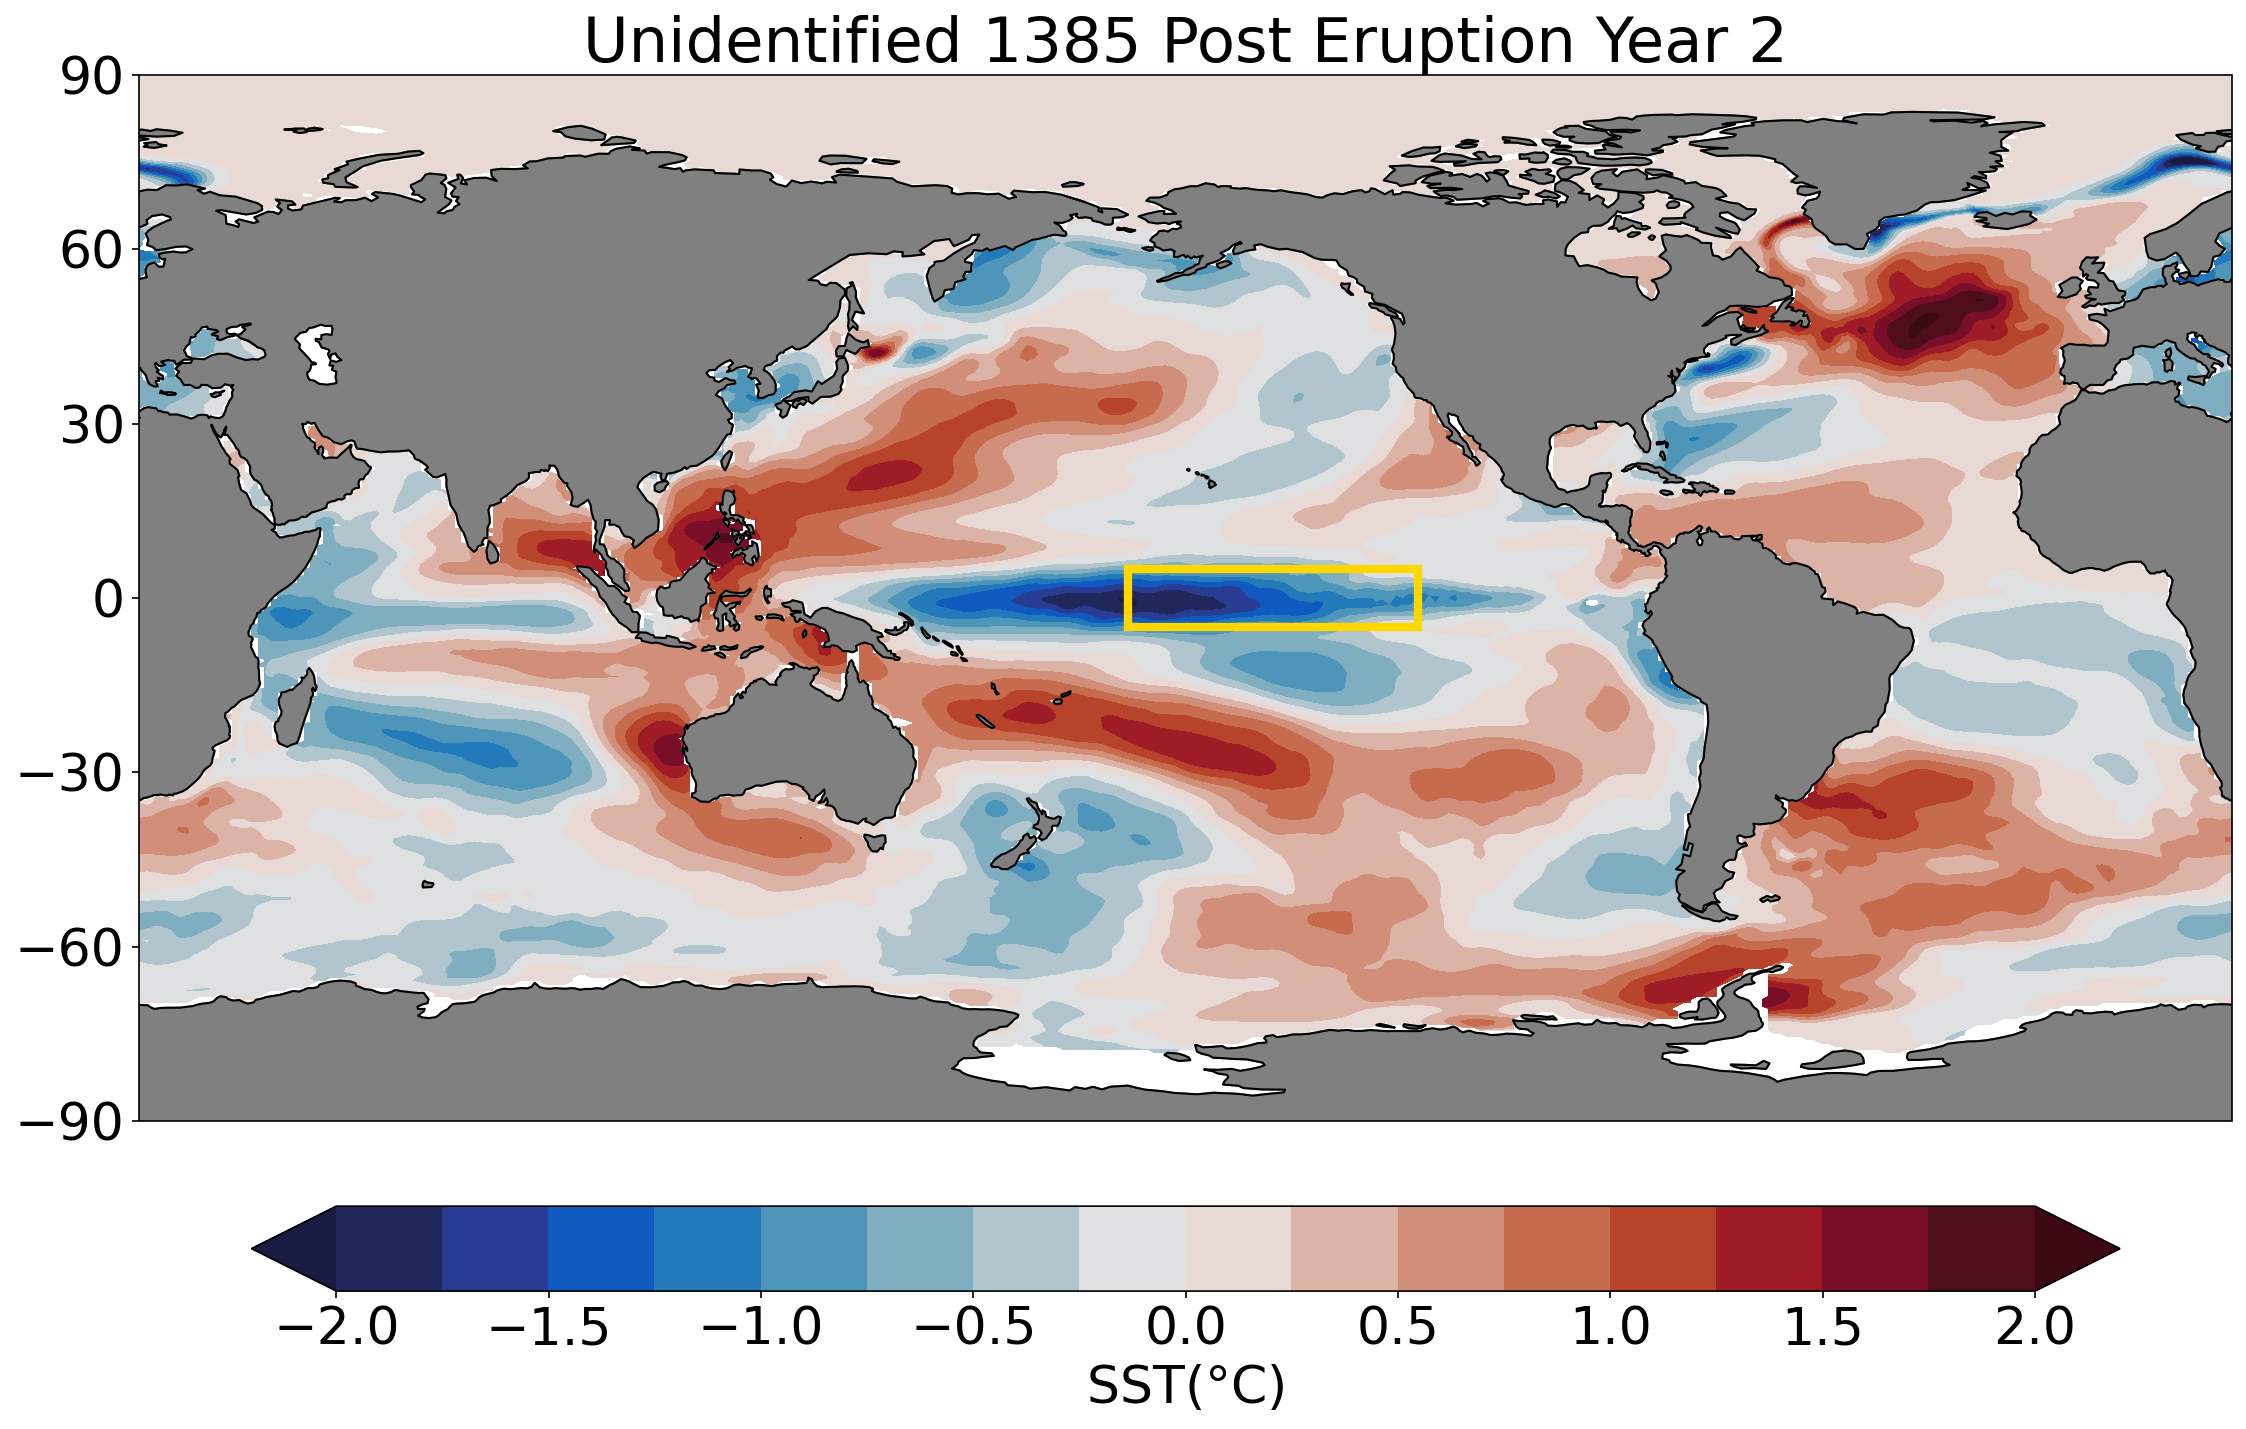

In [124]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident4_post2,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1385 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 5 1458

In [125]:
unident5_post2_anomaly = unident5_post_2yr-monthlydata

In [126]:
unident5_post2_rm = rolling_mean(unident5_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [127]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [128]:
unident5_post2_wm = ENSO_area_weighted_mean(unident5_post2_rm,TAREA)
unident5_post2_wm

array([1.30130069, 0.96632673, 0.67070698, 0.34426379, 0.27397067,
       0.44208939, 0.7332069 , 1.00730965])

In [129]:
TLAT = extract.variables['TLAT'][:]

In [130]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [131]:
unident5_post2_rsst = Trop_area_weighted_mean(unident5_post2_rm,TAREA)
unident5_post2_rsst

array([-1.0666494 , -1.07729537, -1.07262724, -1.09129519, -1.11426047,
       -1.09869183, -1.07536404, -1.07313873])

In [132]:
unident5_post2_ra = unident5_post2_rm[0] - unident5_post2_rsst[0]

In [133]:
plot_data_unident5_post2,new_lats,new_lons = pop_add_cyclic(unident5_post2_ra,data['TLAT'],data['TLONG']) 

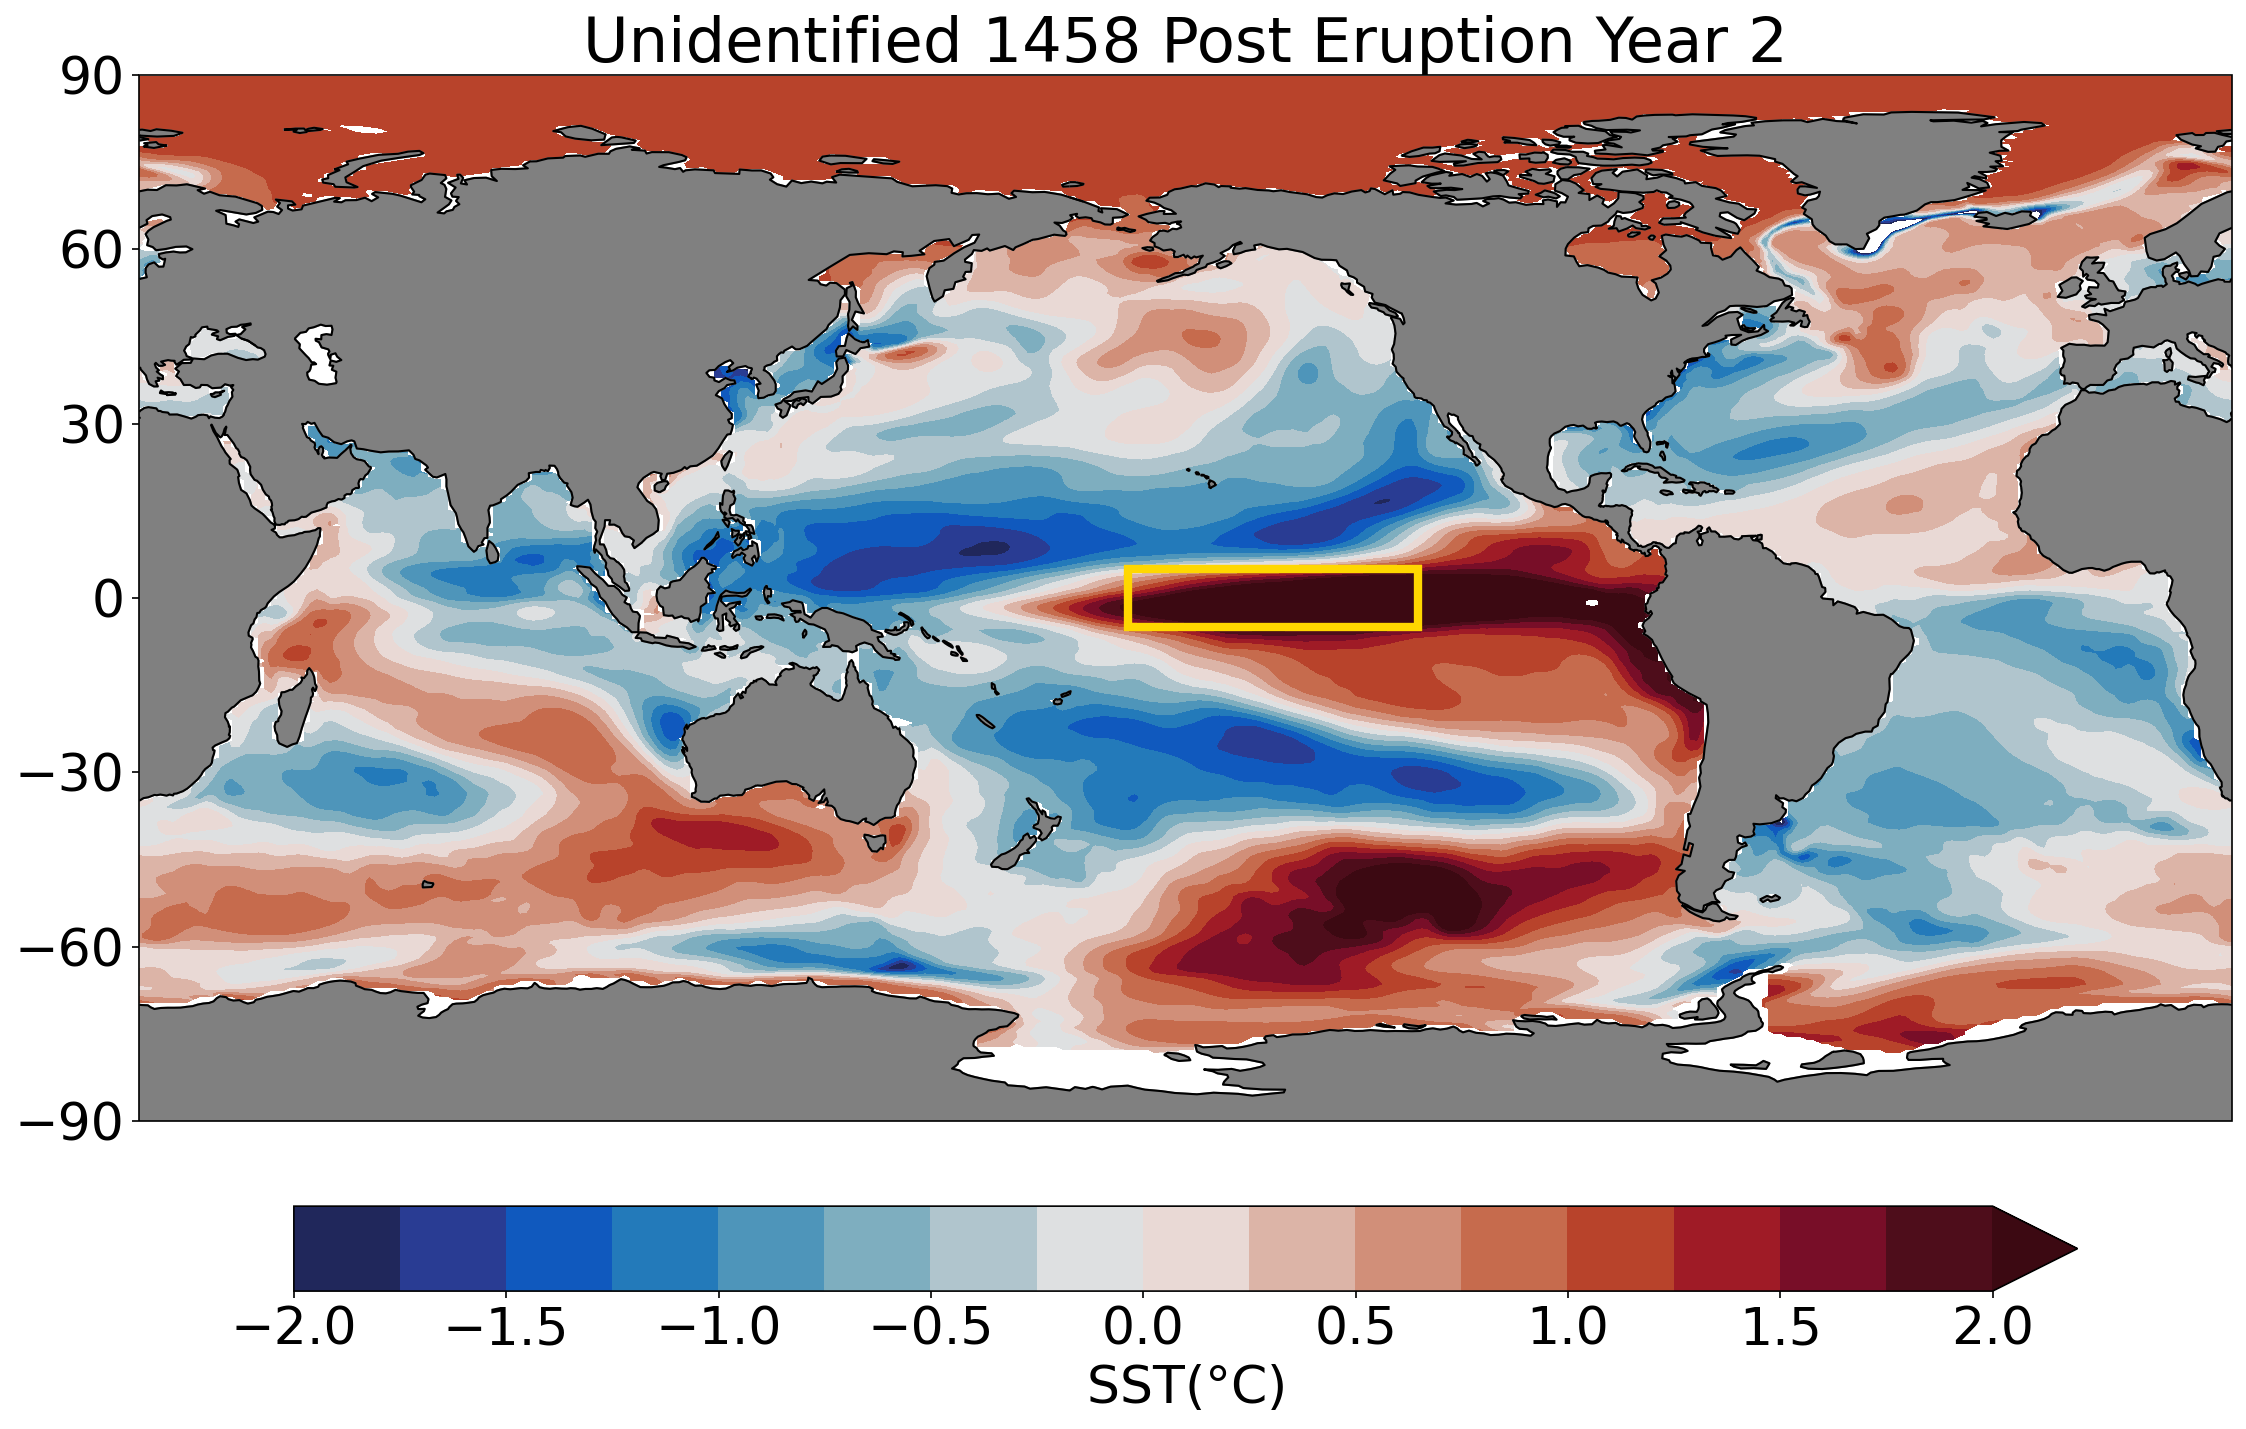

In [136]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident5_post2,extend='max',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1458 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Huayputina 1600

In [137]:
huay_post2_anomaly = huay_post_2yr-monthlydata

In [138]:
huay_post2_rm = rolling_mean(huay_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [139]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [140]:
huay_post2_wm = ENSO_area_weighted_mean(huay_post2_rm,TAREA)
huay_post2_wm

array([1.27219823, 0.96708585, 0.69759245, 0.84159885, 1.20388554,
       1.48683393, 1.79696434, 2.0328944 ])

In [141]:
TLAT = extract.variables['TLAT'][:]

In [142]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [143]:
huay_post2_rsst = Trop_area_weighted_mean(huay_post2_rm,TAREA)
huay_post2_rsst

array([-0.57740476, -0.61003523, -0.65614055, -0.65562179, -0.60909525,
       -0.56945825, -0.54038833, -0.52520505])

In [144]:
huay_post2_ra = huay_post2_rm[0] - huay_post2_rsst[0]

In [145]:
plot_data_huay_post2,new_lats,new_lons = pop_add_cyclic(huay_post2_ra,data['TLAT'],data['TLONG']) 

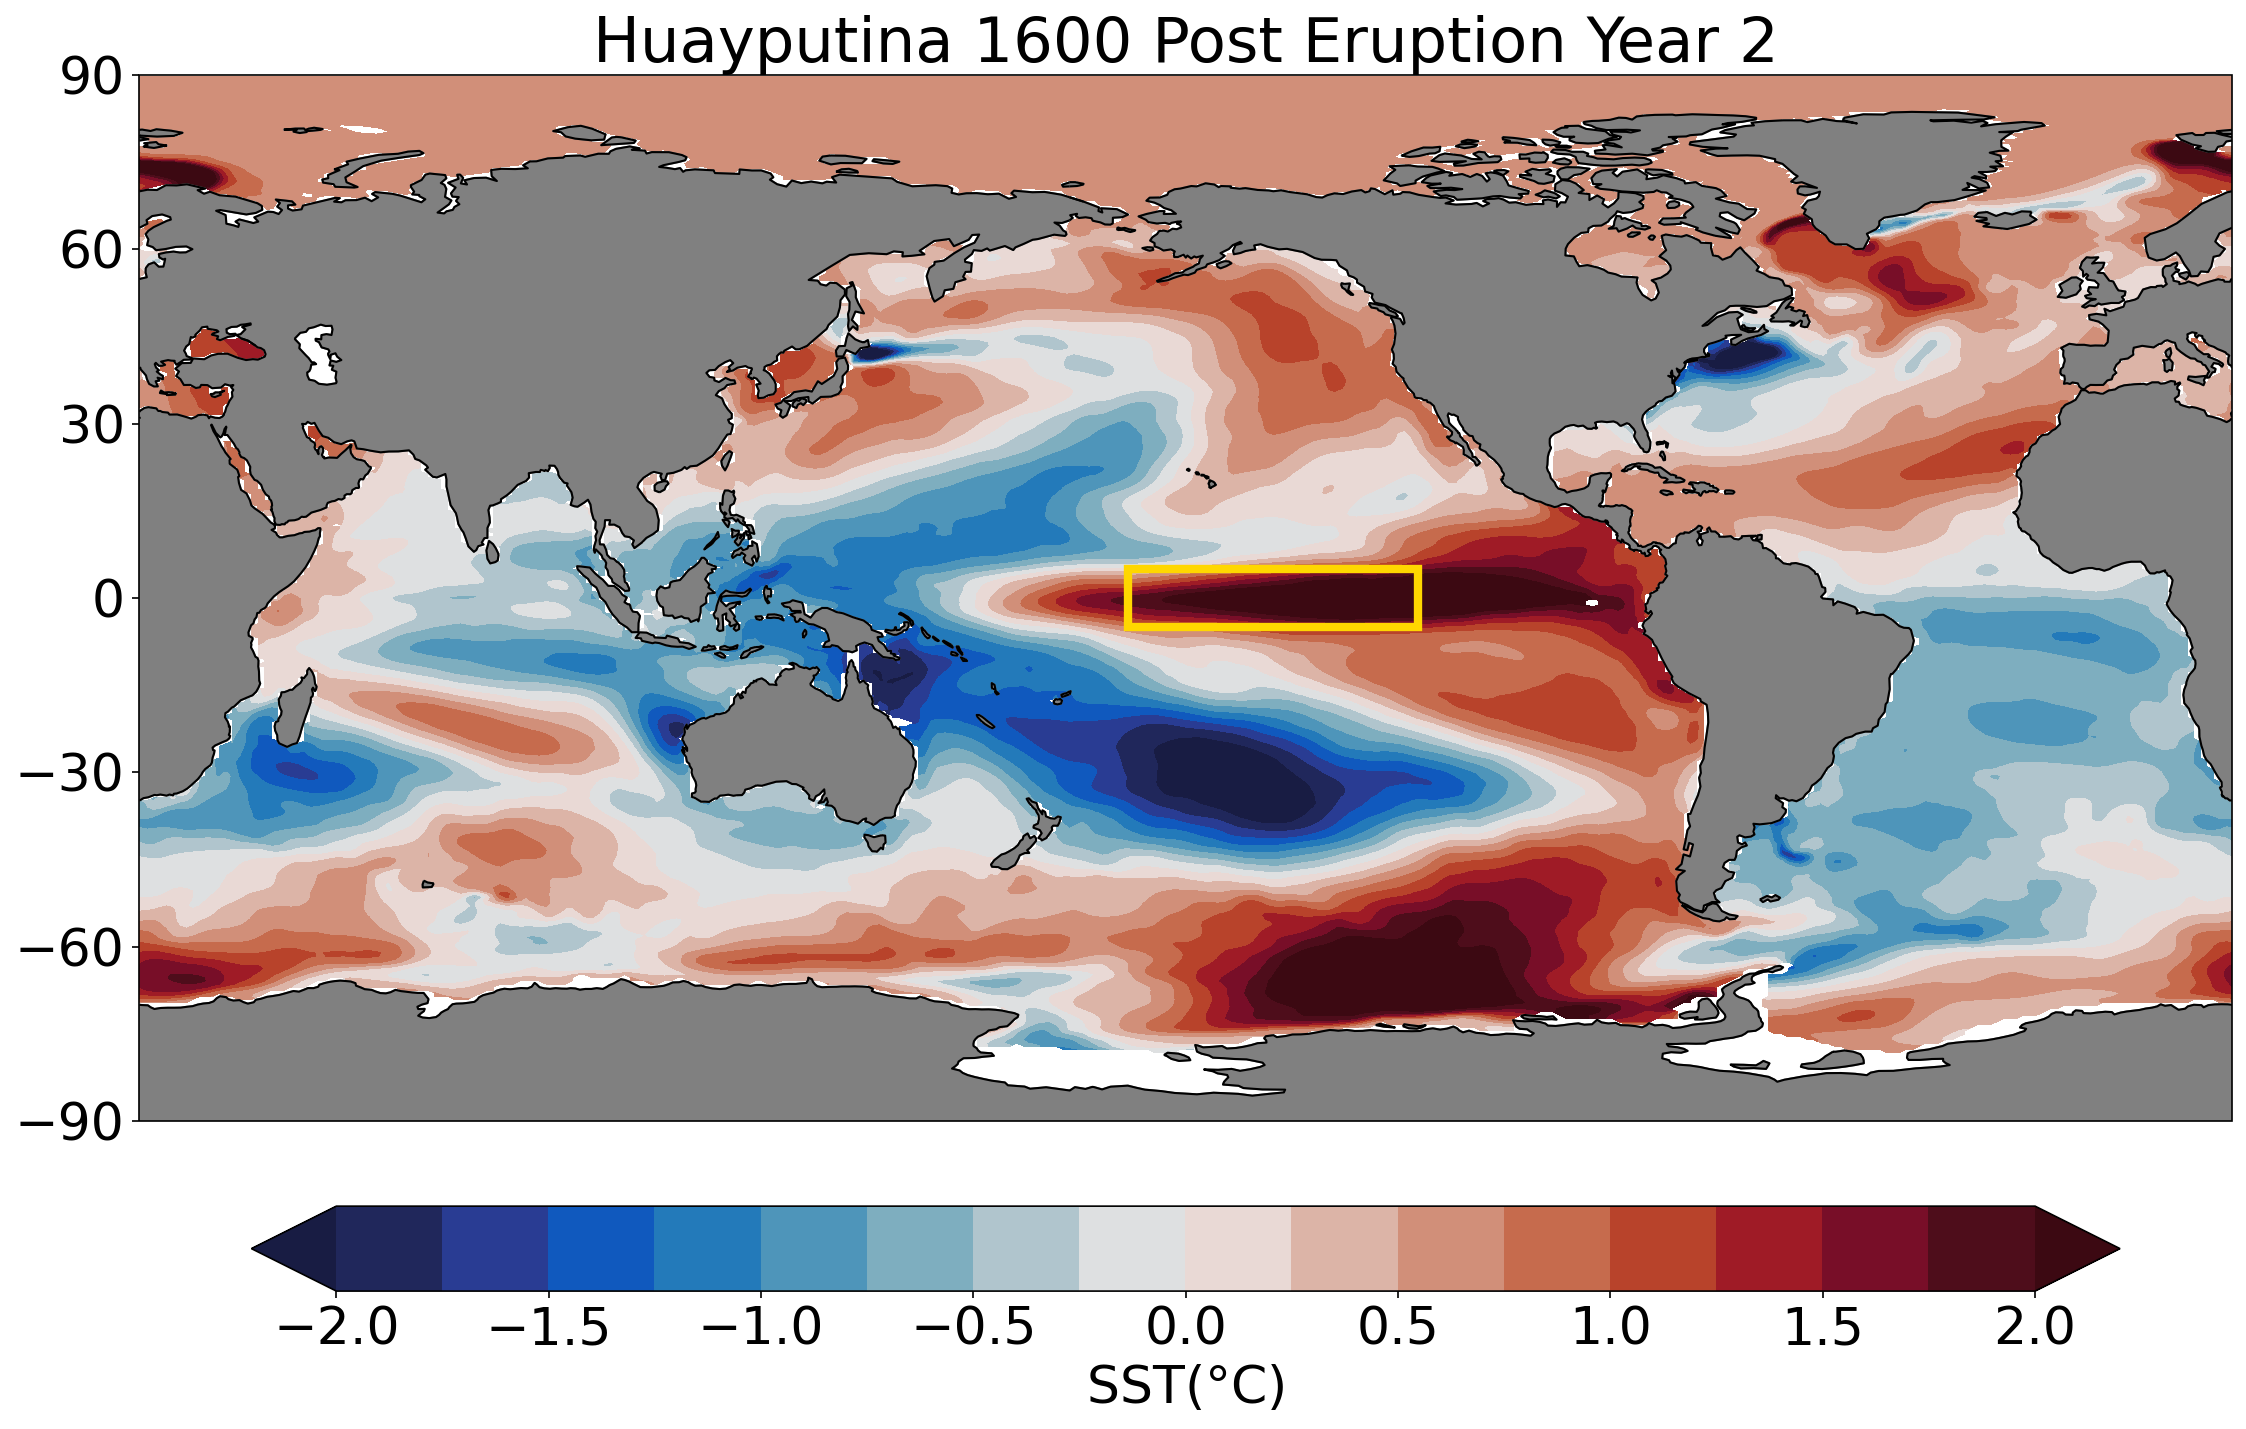

In [147]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_huay_post2,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Huayputina 1600 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Parker 1640

In [150]:
parker_post2_anomaly = parker_post_2yr-monthlydata

In [151]:
parker_post2_rm = rolling_mean(parker_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [152]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [153]:
parker_post2_wm = ENSO_area_weighted_mean(parker_post2_rm,TAREA)
parker_post2_wm

array([1.41954351, 1.34359939, 1.05248242, 0.77923794, 0.54646661,
       0.33566318, 0.21147099, 0.03295541])

In [154]:
TLAT = extract.variables['TLAT'][:]

In [155]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [156]:
parker_post2_rsst = Trop_area_weighted_mean(parker_post2_rm,TAREA)
parker_post2_rsst

array([-0.2341971 , -0.24667608, -0.25550833, -0.27969615, -0.2908229 ,
       -0.27772176, -0.27320296, -0.28974495])

In [157]:
parker_post2_ra = parker_post2_rm[0] - parker_post2_rsst[0]

In [158]:
plot_data_parker_post2,new_lats,new_lons = pop_add_cyclic(parker_post2_ra,data['TLAT'],data['TLONG'])

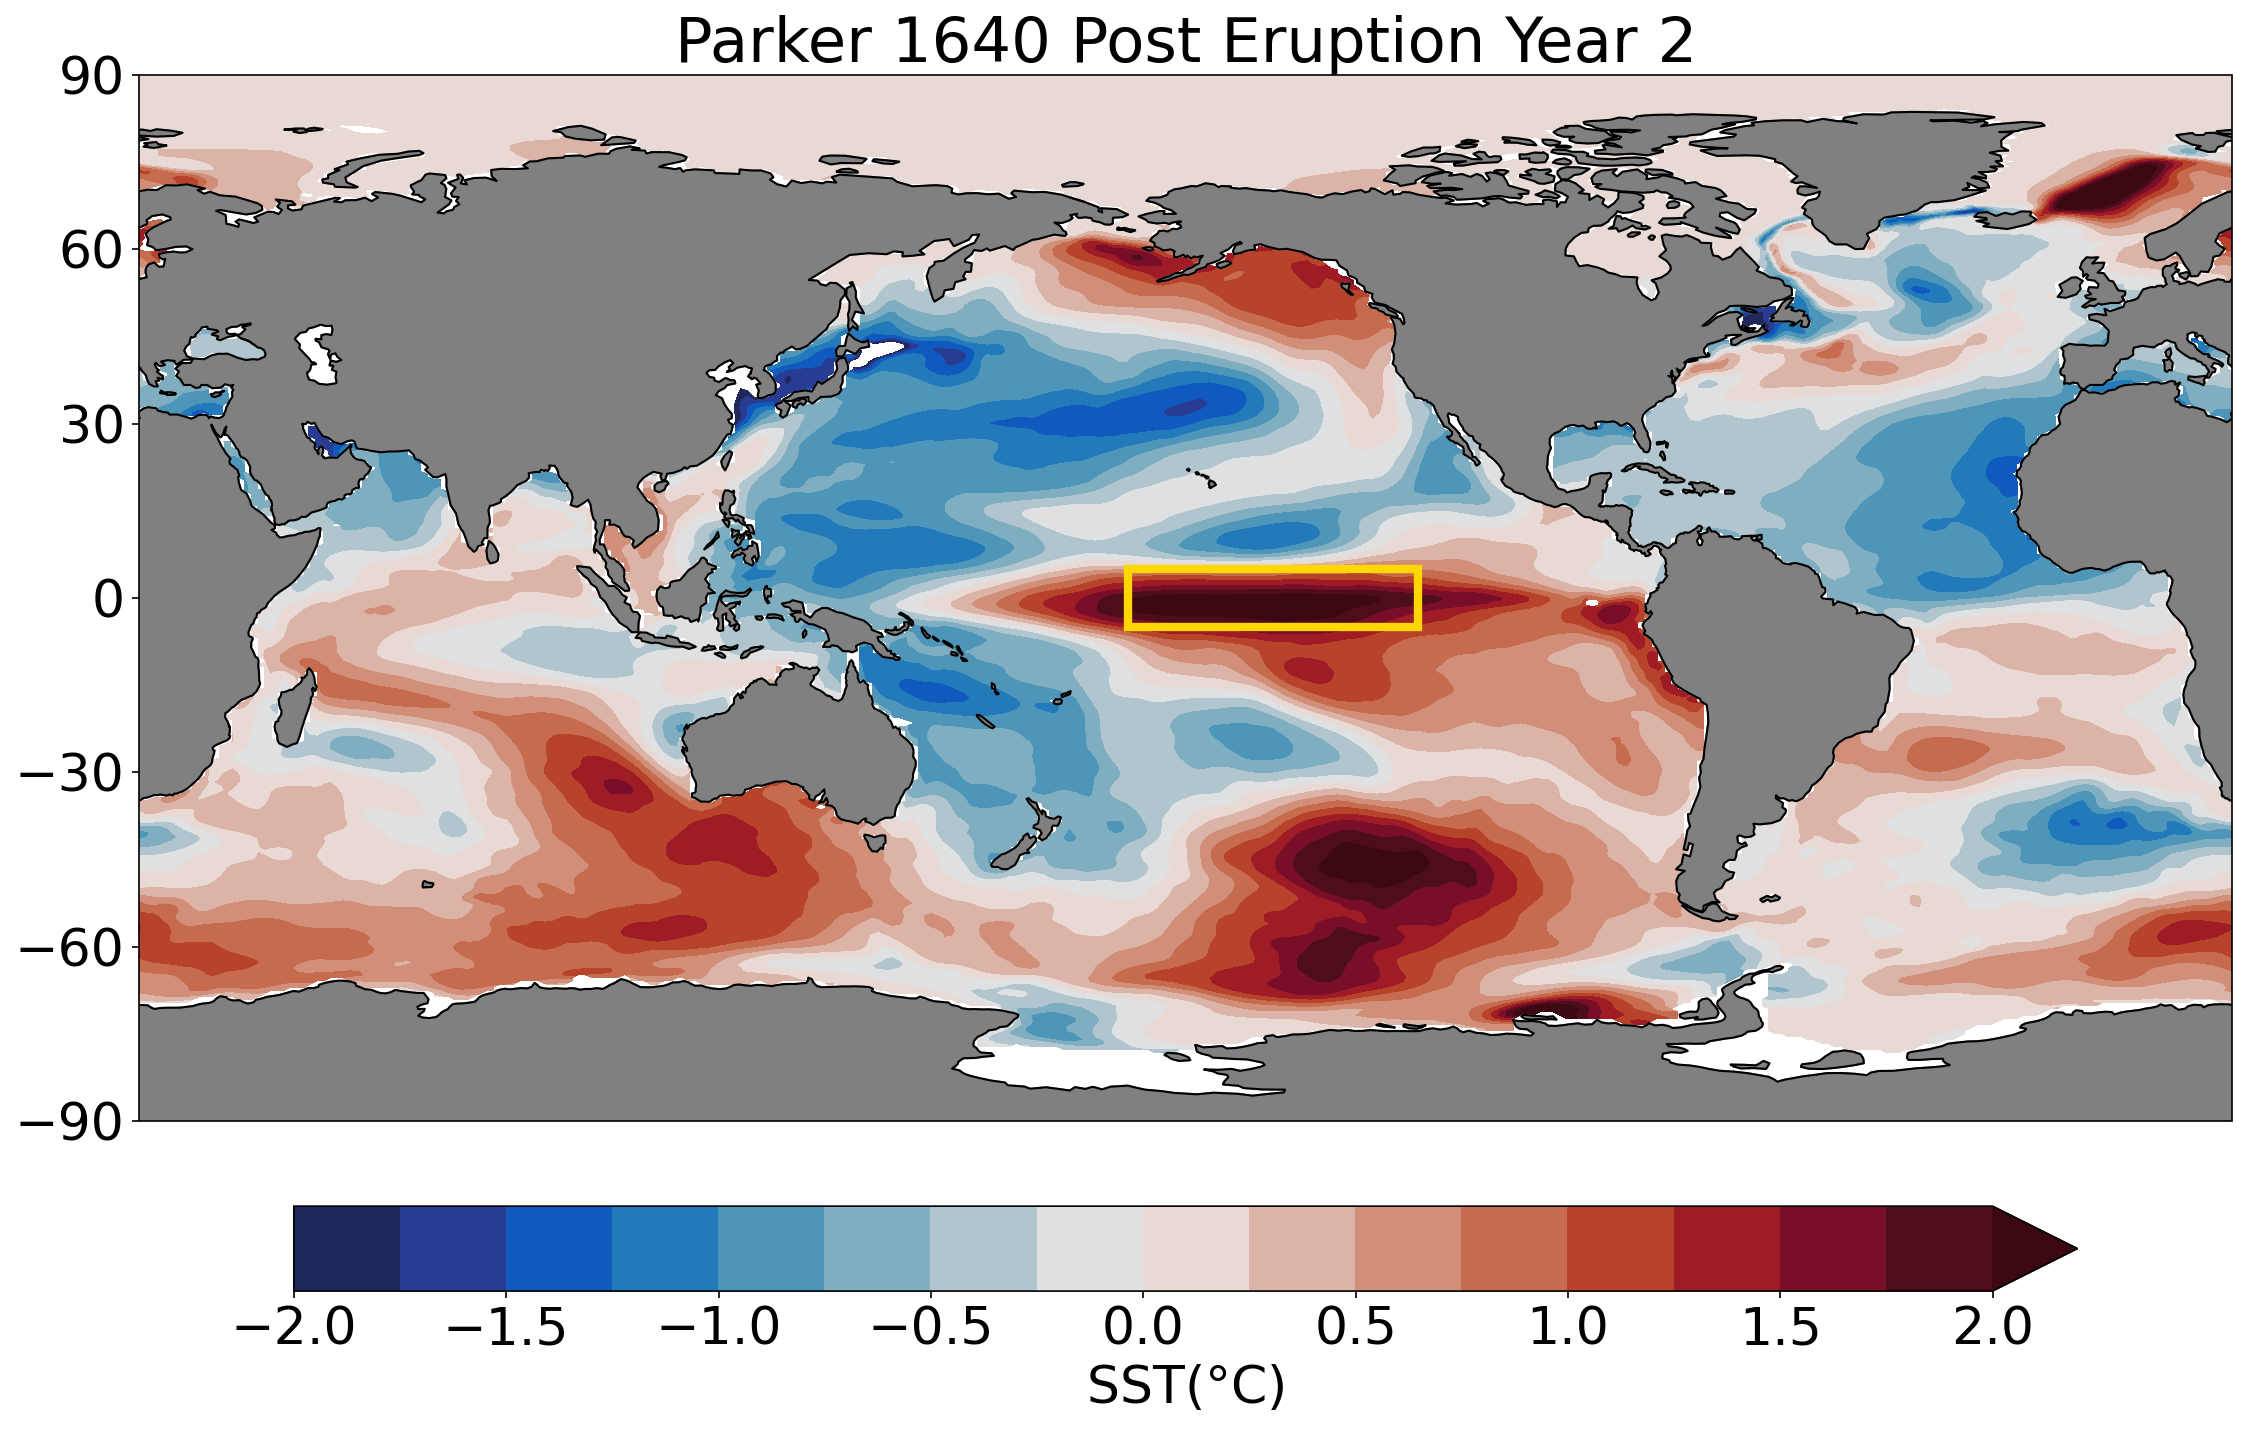

In [160]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_parker_post2, extend='max',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Parker 1640 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 6 1809

In [161]:
unident6_post2_anomaly = unident6_post_2yr-monthlydata

In [162]:
unident6_post2_rm = rolling_mean(unident6_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [163]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [164]:
unident6_post2_wm = ENSO_area_weighted_mean(unident6_post2_rm,TAREA)
unident6_post2_wm

array([ 1.65643943,  1.36313063,  1.00063197,  0.66881743,  0.33996163,
       -0.02641906, -0.07738831,  0.19420051])

In [165]:
TLAT = extract.variables['TLAT'][:]

In [166]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [167]:
unident6_post2_rsst = Trop_area_weighted_mean(unident6_post2_rm,TAREA)
unident6_post2_rsst

array([-0.39000436, -0.39786903, -0.40752545, -0.40542737, -0.40082368,
       -0.40238025, -0.40162762, -0.40964017])

In [168]:
unident6_post2_ra = unident6_post2_rm[0] - unident6_post2_rsst[0]

In [169]:
plot_data_unident6_post2,new_lats,new_lons = pop_add_cyclic(unident6_post2_ra,data['TLAT'],data['TLONG']) 

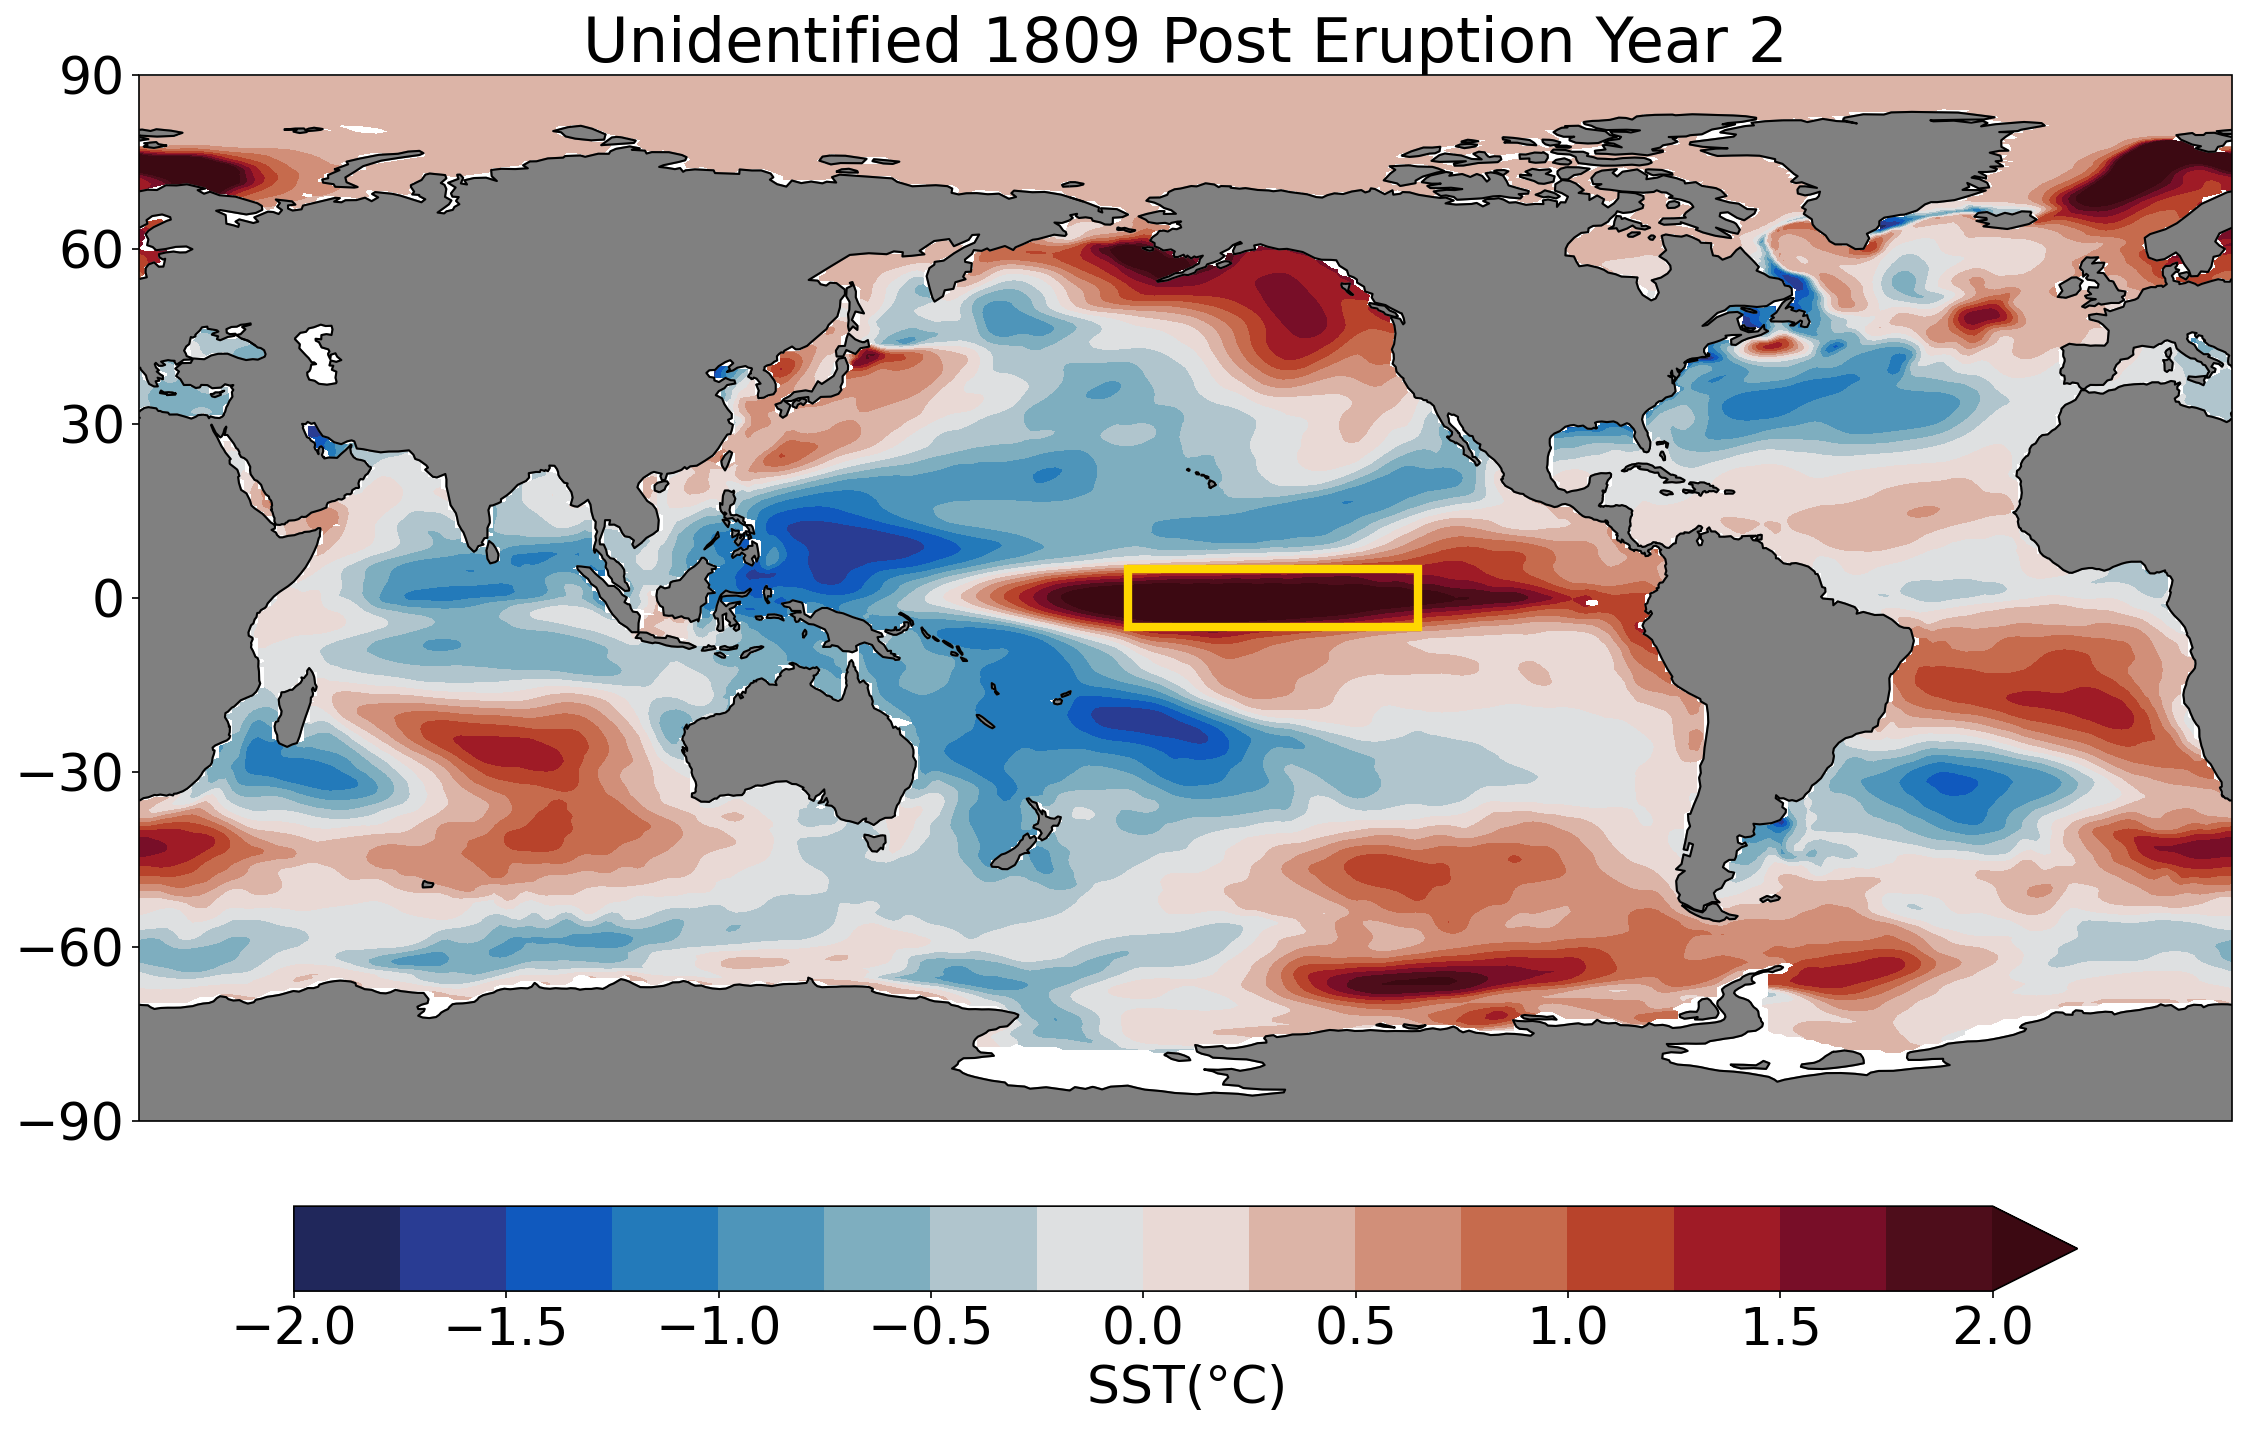

In [171]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident6_post2,extend='max',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1809 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Tambora 1815

In [172]:
tambora_post2_anomaly = tambora_post_2yr-monthlydata

In [173]:
tambora_post2_rm = rolling_mean(tambora_post2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [174]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [175]:
tambora_post2_wm = ENSO_area_weighted_mean(tambora_post2_rm,TAREA)
tambora_post2_wm

array([ 0.47168575,  0.2372922 , -0.00459958, -0.2556579 , -0.49497195,
       -0.523006  , -0.3344303 , -0.14823436])

In [176]:
TLAT = extract.variables['TLAT'][:]

In [177]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [178]:
tambora_post2_rsst = Trop_area_weighted_mean(tambora_post2_rm,TAREA)
tambora_post2_rsst

array([-1.13515493, -1.12911237, -1.12760059, -1.13640702, -1.16976494,
       -1.17443996, -1.16378143, -1.17095778])

In [179]:
tambora_post2_ra = tambora_post2_rm[0] - tambora_post2_rsst[0]

In [180]:
plot_data_tambora_post2,new_lats,new_lons = pop_add_cyclic(tambora_post2_ra,data['TLAT'],data['TLONG'])

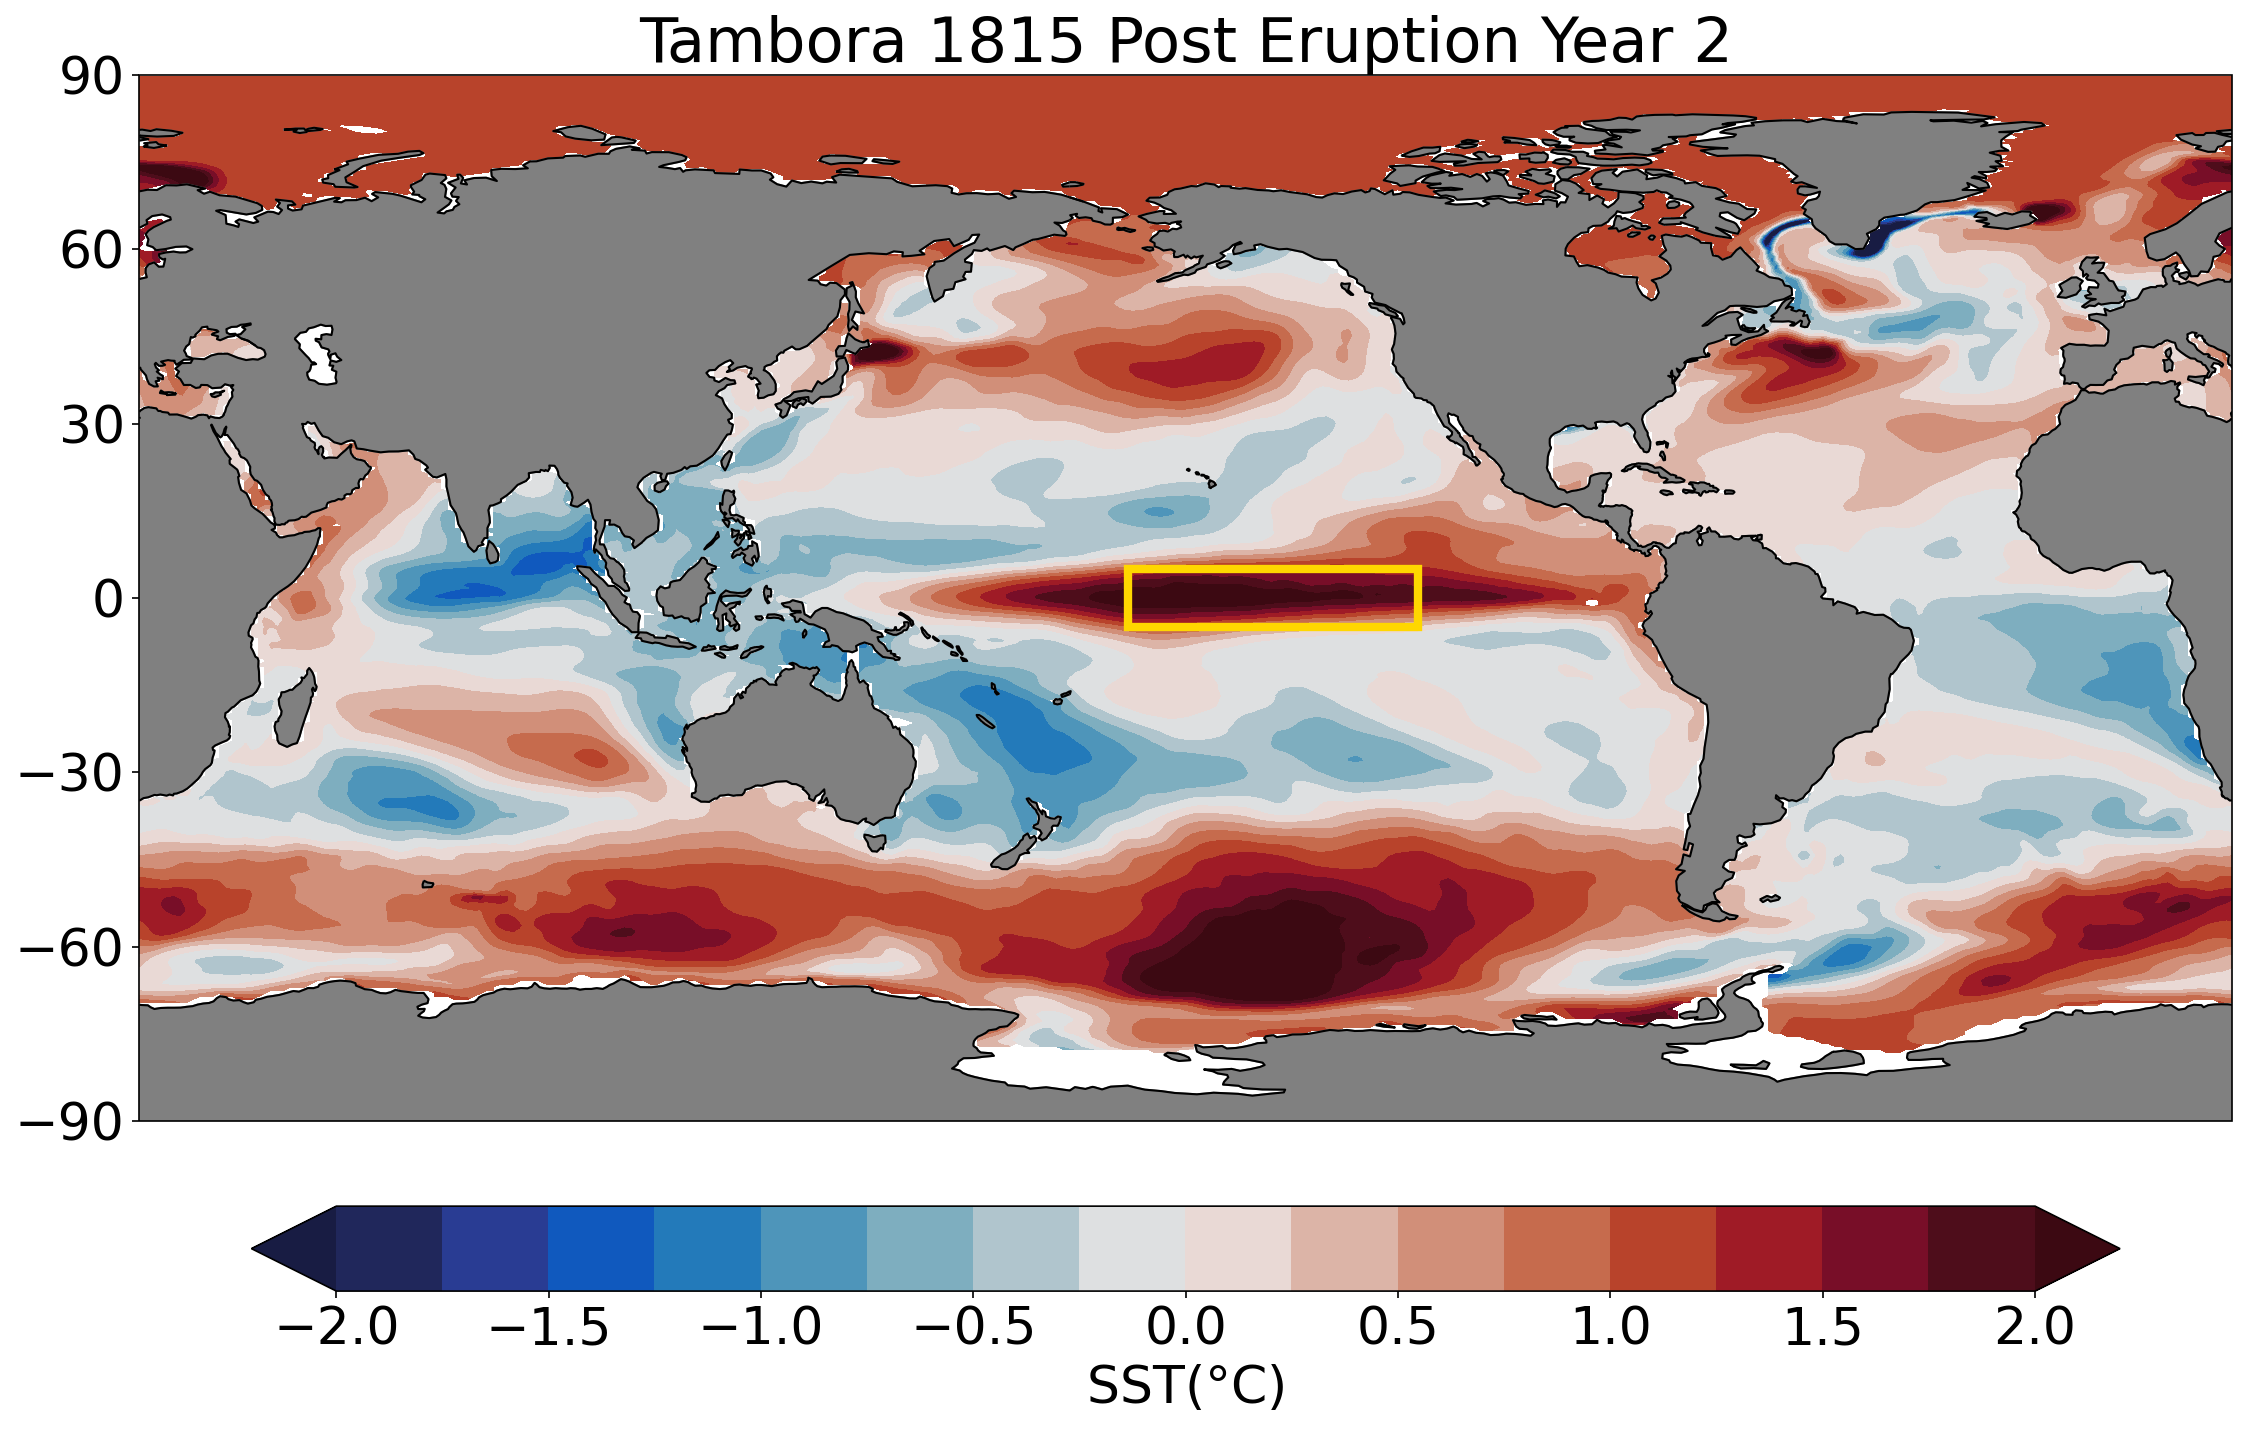

In [182]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_tambora_post2,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Tambora 1815 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)